In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from utilities import *

# Version final de los datos
Actualizado Septiembre 10, 2024

Primero, miremos la distribucion del ln_kappa (nuestra metrica de impulsividad)

Text(0, 0.5, 'frecuencia')

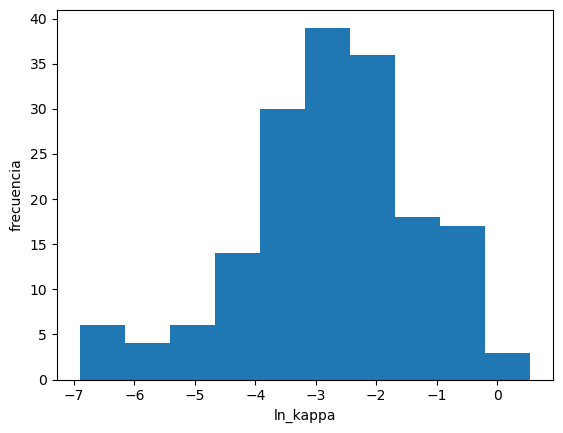

In [44]:
df = pd.read_excel('datosMCmasdescuento_20240910.xlsx')
plt.hist(df['ln_kappa'])
plt.xlabel('ln_kappa')
plt.ylabel('frecuencia')

Segundo, las variables que queremos usar para explicarla

In [34]:
x = df.columns.unique()
for x in df.columns.unique():
    print(x)

record_id
DATE_BIRTH
AGE
SEX
WEIGHT_AVG
HEIGHT_AVG
WAIST_AVG
WHrT
WHrT_Risk
BMI
CHVI_BMI
MIN_HR
SBP_AVG
DBP_AVG
CHVI_BP
CHOLESTEROL_MG_DL
CHVI_CHOL
GLUCOSE_MG_DL
CHVI_GLUC
TOBACCO
CHVI_TOBACCO
VPA
VPA_METS
MPA
MPA_METS
CVHI_PA
WALKING
WALKING_METS
MIN_WK_SIT
TOTAL_METS
GRAINS
BEVERAGE
FRUITS
CVHI_DIET
TOTAL_CVHI
FANTASIA_T
PREO_EMPATICA
TOMA_PERSPECTIVA
MALESTAR_PERSONAL
PSS_TOTAL
PSS_Clas
Atencion_Emocional
AE_Clas
CLARIDAD_SENTIMIENTOS
CS_Clas
Rep_Emocional
RE_Clas
kappa
ln_kappa
beta
r2
percentImp


# Pregunta 1:
## Como se relaciona la impulsividad con la salud cardiovascular?

### 1.1 Con el puntaje total (TOTAL_CVHI)?

                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5674
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.453
Time:                        18:48:03   Log-Likelihood:                -208.17
No. Observations:                 114   AIC:                             420.3
Df Residuals:                     112   BIC:                             425.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0561      1.058     -1.944      0.0

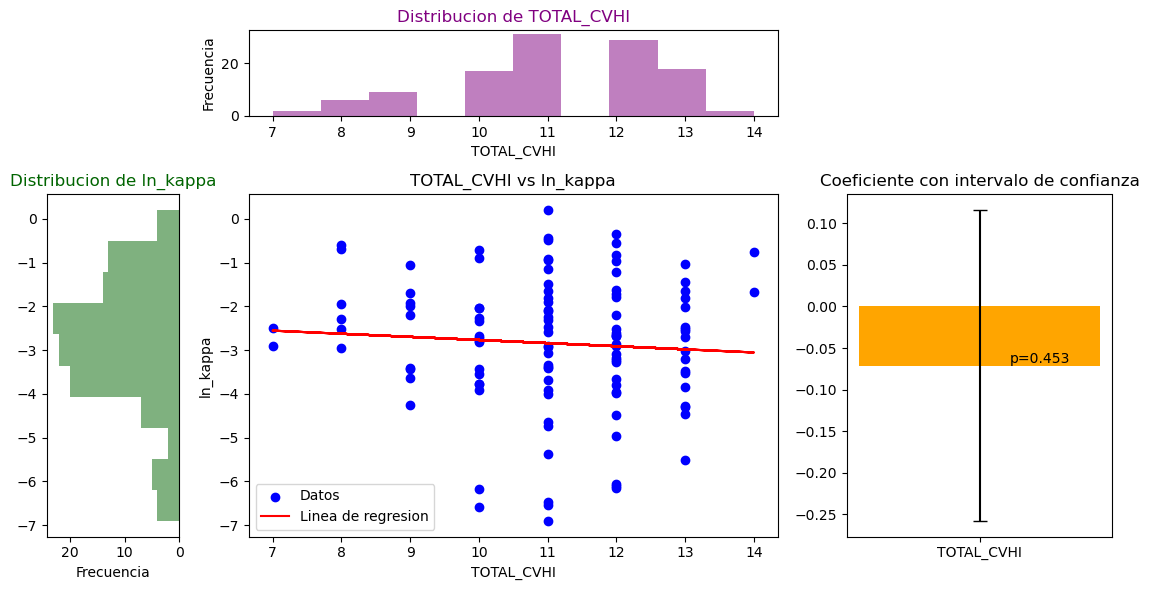

In [35]:

model, df_clean, x_clean, y_clean = ols_lR(df, 'TOTAL_CVHI')
plot_regression_results_with_coefficients(model, df_clean, x_clean, y_clean)


### 1.2 No, entonces miremos los componentes individuales

IMC? Nuestro primer resultado positivo!

                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.145
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0434
Time:                        18:48:03   Log-Likelihood:                -298.33
No. Observations:                 166   AIC:                             600.7
Df Residuals:                     164   BIC:                             606.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3344      0.769     -5.638      0.0

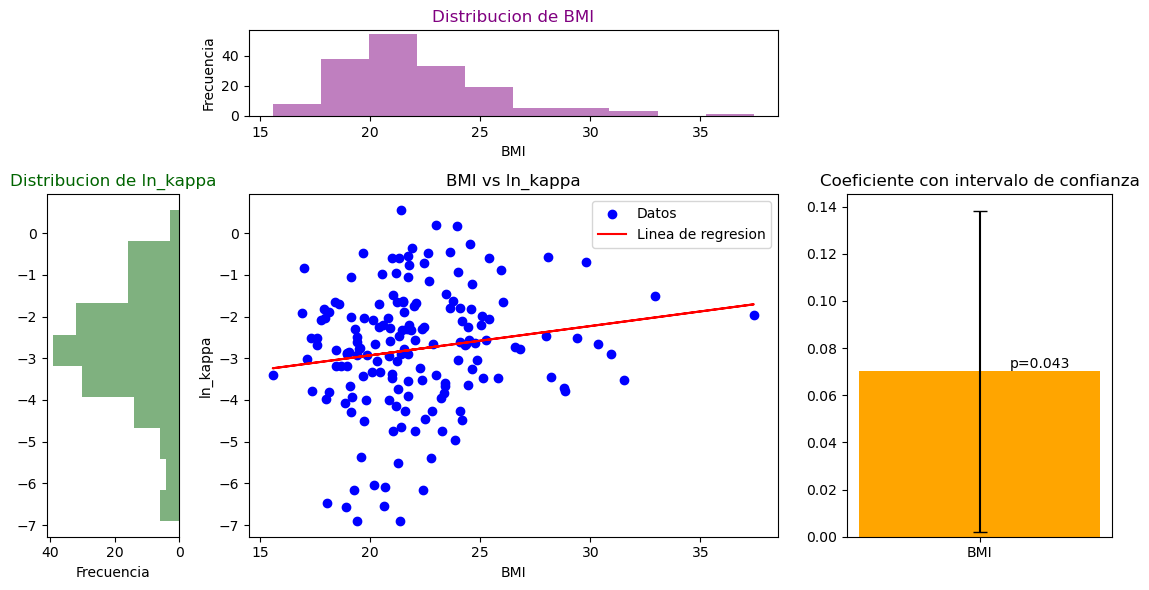

In [36]:
model, df_clean, x_clean, y_clean = ols_lR(df, 'BMI')
plot_regression_results_with_coefficients(model, df_clean, x_clean, y_clean)

No sorprendentemente, el peso tambien.
Pero esto es un sanity check de que todo este funcionando 

                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.196
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0239
Time:                        18:48:04   Log-Likelihood:                -297.82
No. Observations:                 166   AIC:                             599.6
Df Residuals:                     164   BIC:                             605.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1692      0.617     -6.755      0.0

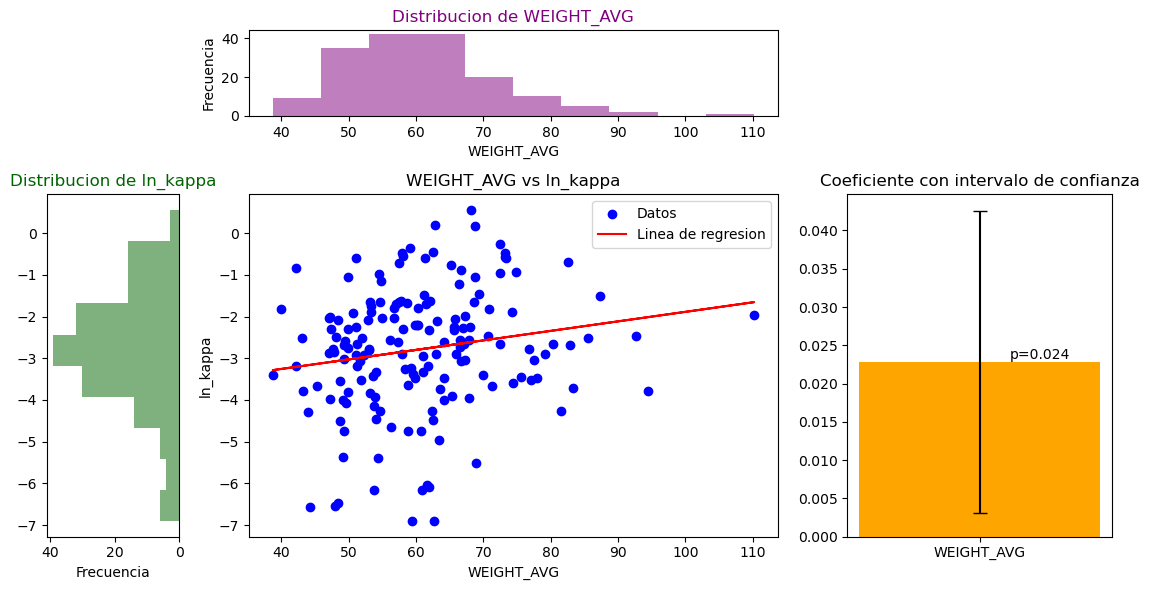

In [37]:
model, df_clean, x_clean, y_clean = ols_lR(df, 'WEIGHT_AVG')
plot_regression_results_with_coefficients(model, df_clean, x_clean, y_clean)

Waist to hip ratio, no

                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.684
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.103
Time:                        18:48:05   Log-Likelihood:                -304.26
No. Observations:                 169   AIC:                             612.5
Df Residuals:                     167   BIC:                             618.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4333      1.026     -4.321      0.0

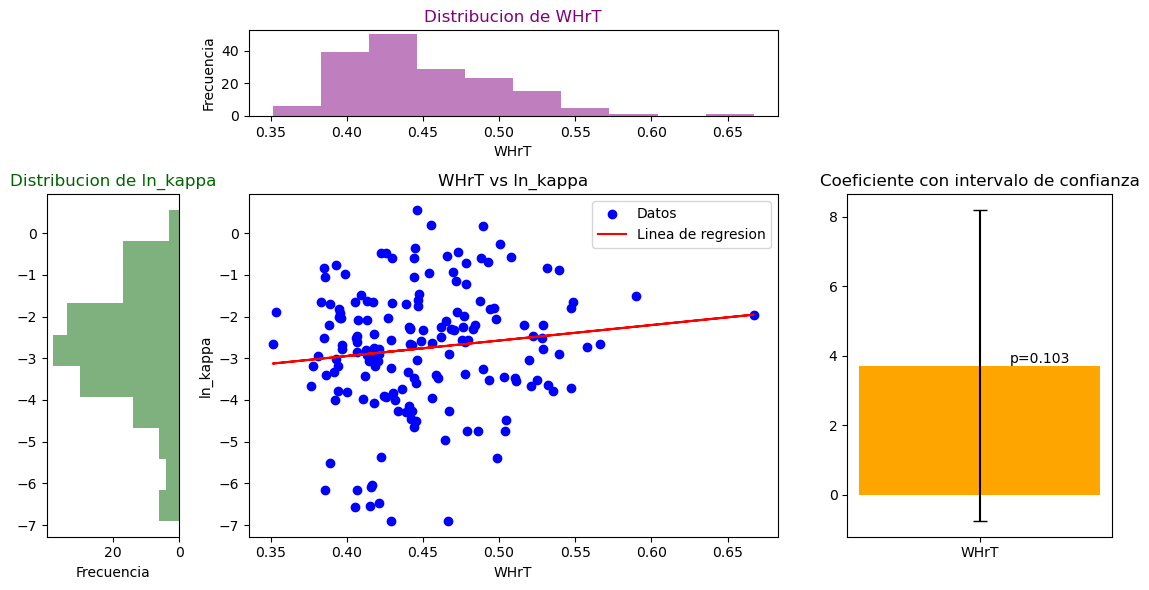

In [38]:
model, df_clean, x_clean, y_clean = ols_lR(df, 'WHrT')
plot_regression_results_with_coefficients(model, df_clean, x_clean, y_clean)

Pero WAIST_AVG si, sugiero revisar como se esta calculando

                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.945
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0486
Time:                        18:48:05   Log-Likelihood:                -306.76
No. Observations:                 171   AIC:                             617.5
Df Residuals:                     169   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6294      0.953     -4.860      0.0

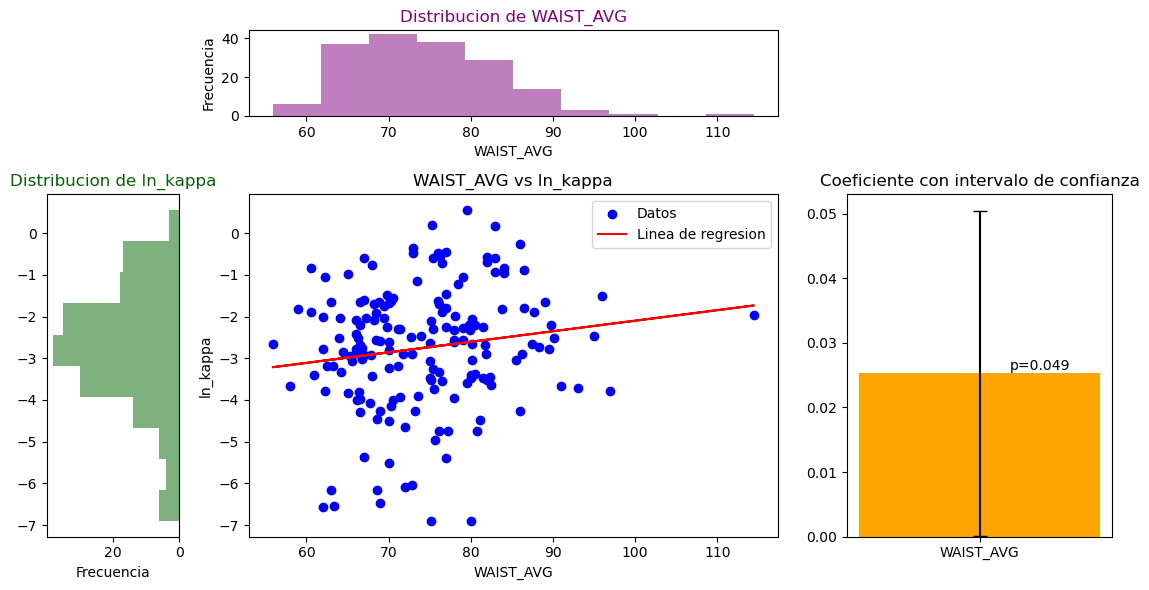

In [39]:
model, df_clean, x_clean, y_clean = ols_lR(df, 'WAIST_AVG')
plot_regression_results_with_coefficients(model, df_clean, x_clean, y_clean)

Tabaquismo

                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.288
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0412
Time:                        18:48:25   Log-Likelihood:                -170.36
No. Observations:                  95   AIC:                             344.7
Df Residuals:                      93   BIC:                             349.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4747      1.279     -4.281      0.0

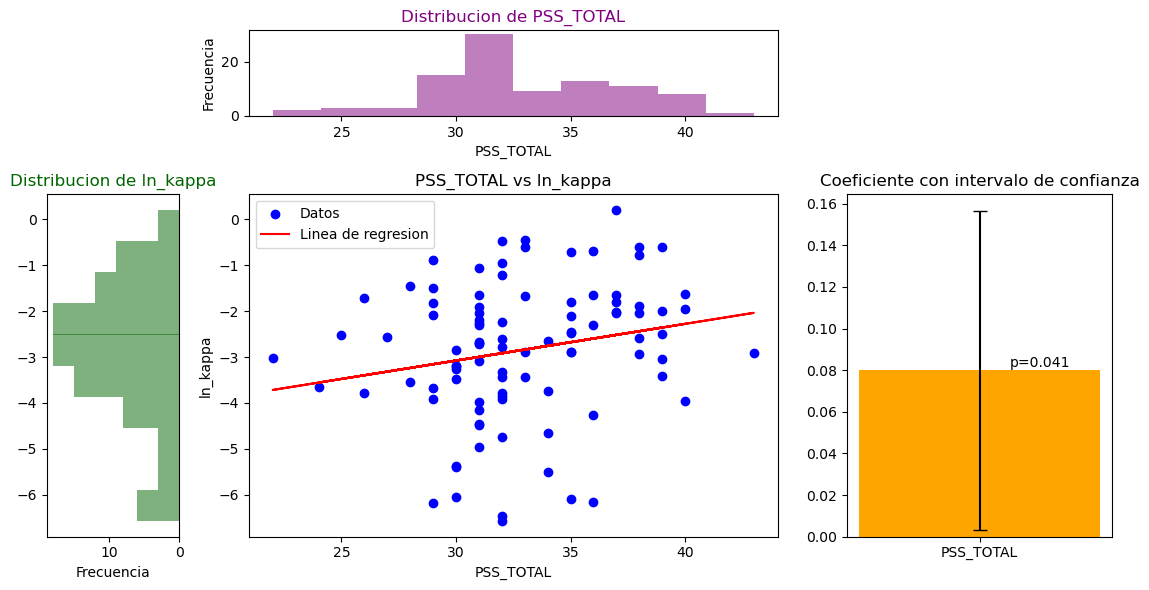

In [41]:
df = df.query('PSS_TOTAL>10')
model, df_clean, x_clean, y_clean = ols_lR(df, 'PSS_TOTAL')
plot_regression_results_with_coefficients(model, df_clean, x_clean, y_clean)

## Por hacer:
1. Regresion de variables categoricas
    lineal con dummy variables para distinticas categorias
2. logistica para eventos binarios


## loop que grafica todo de una vez...
Esto es solo para tener una idea general de la visualizacion, luego toca ver cada caso particular (p.ej, usar o no escala logaritmica, categorizar, etc)

Running regression for record_id
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4668
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.495
Time:                        18:45:30   Log-Likelihood:                -311.12
No. Observations:                 173   AIC:                             626.2
Df Residuals:                     171   BIC:                             632.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.59

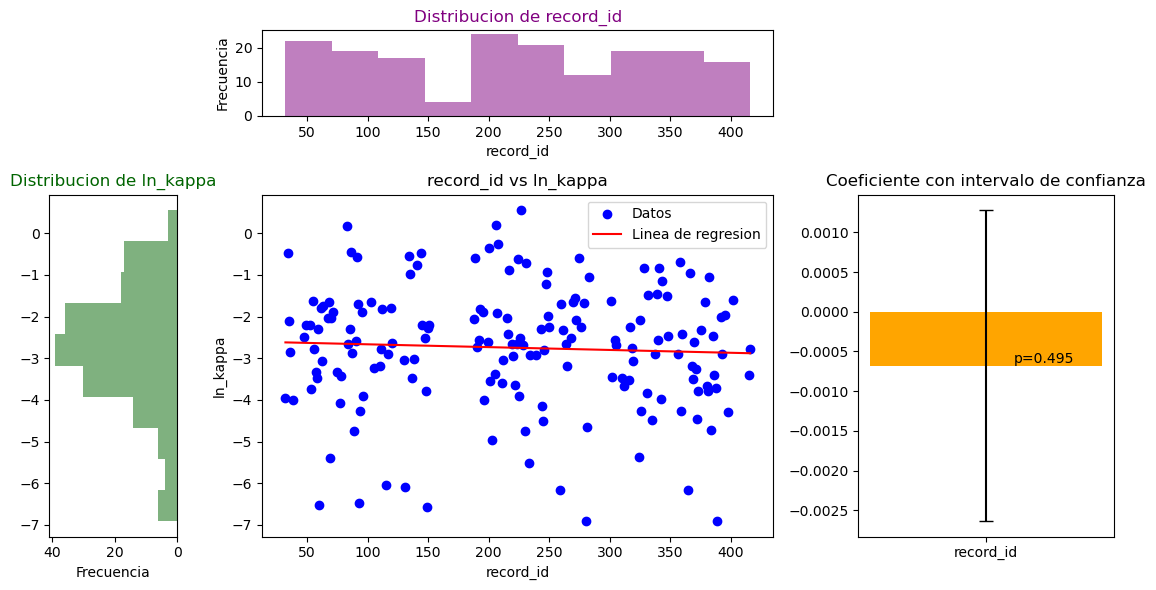

Running regression for AGE
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.298
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.256
Time:                        18:45:30   Log-Likelihood:                -310.71
No. Observations:                 173   AIC:                             625.4
Df Residuals:                     171   BIC:                             631.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2298    

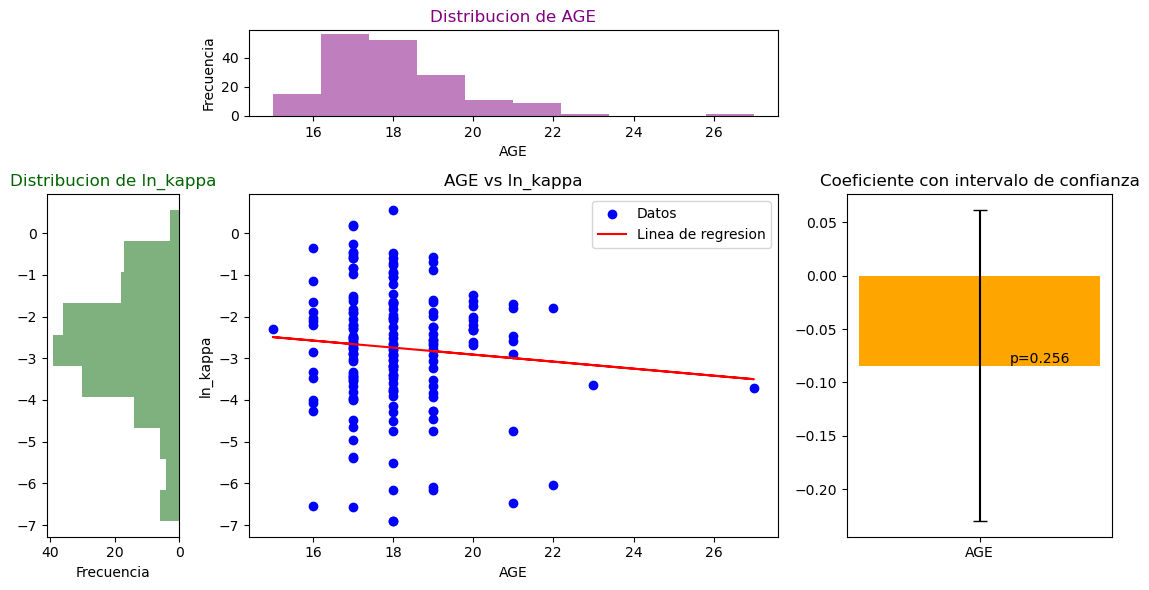

Running regression for SEX
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.05990
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.807
Time:                        18:45:31   Log-Likelihood:                -311.33
No. Observations:                 173   AIC:                             626.7
Df Residuals:                     171   BIC:                             633.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6705    

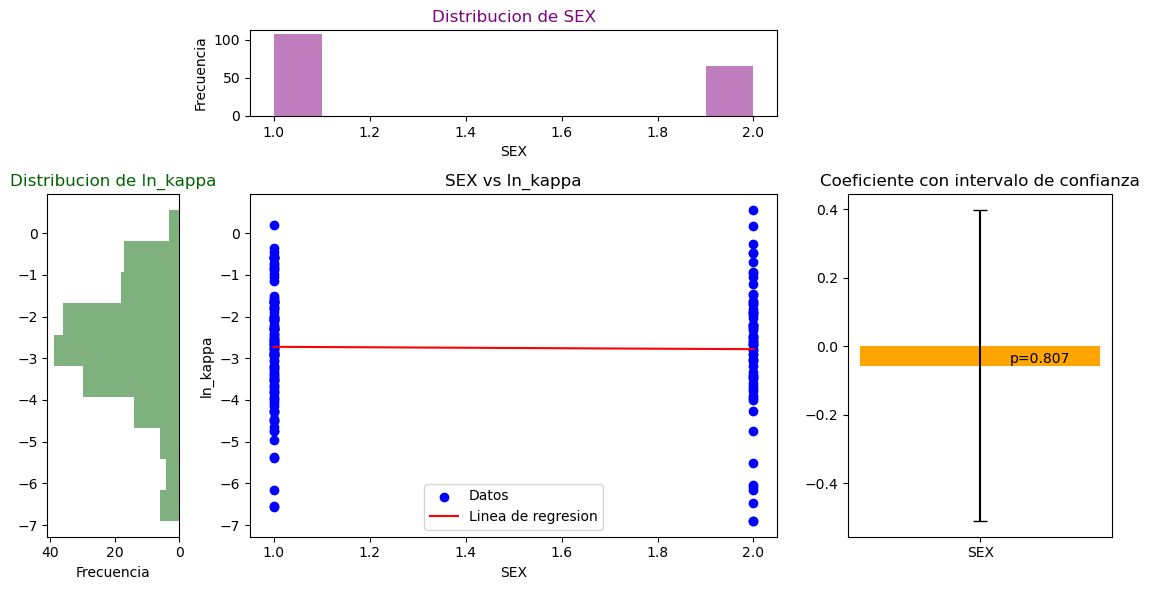

Running regression for WEIGHT_AVG
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.196
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0239
Time:                        18:45:32   Log-Likelihood:                -297.82
No. Observations:                 166   AIC:                             599.6
Df Residuals:                     164   BIC:                             605.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1

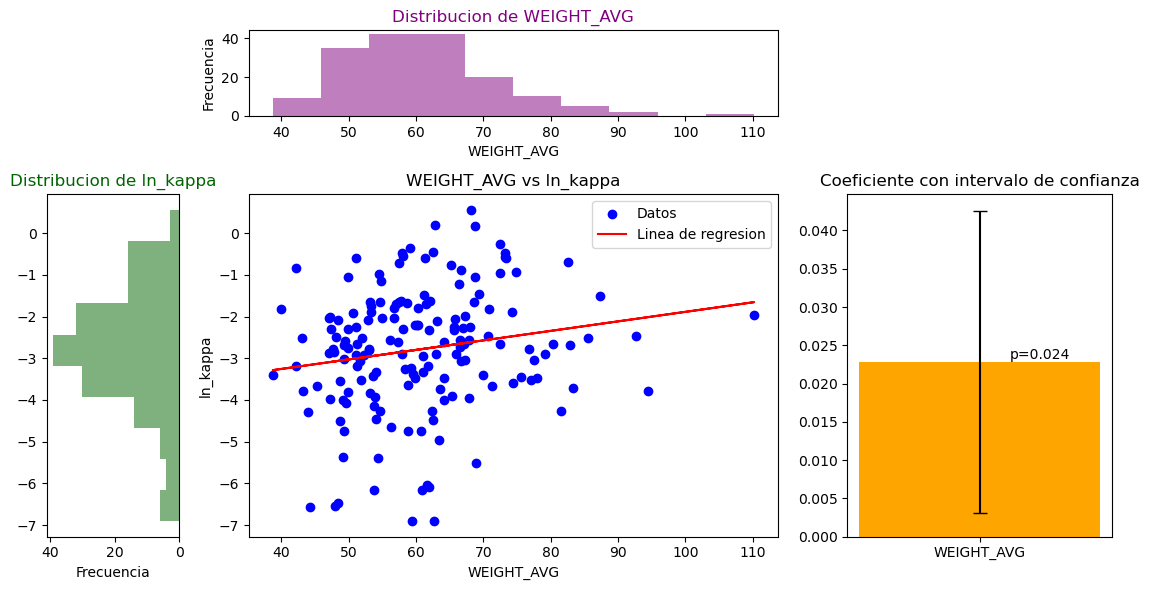

Running regression for HEIGHT_AVG
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.078
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.301
Time:                        18:45:32   Log-Likelihood:                -307.70
No. Observations:                 171   AIC:                             619.4
Df Residuals:                     169   BIC:                             625.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9

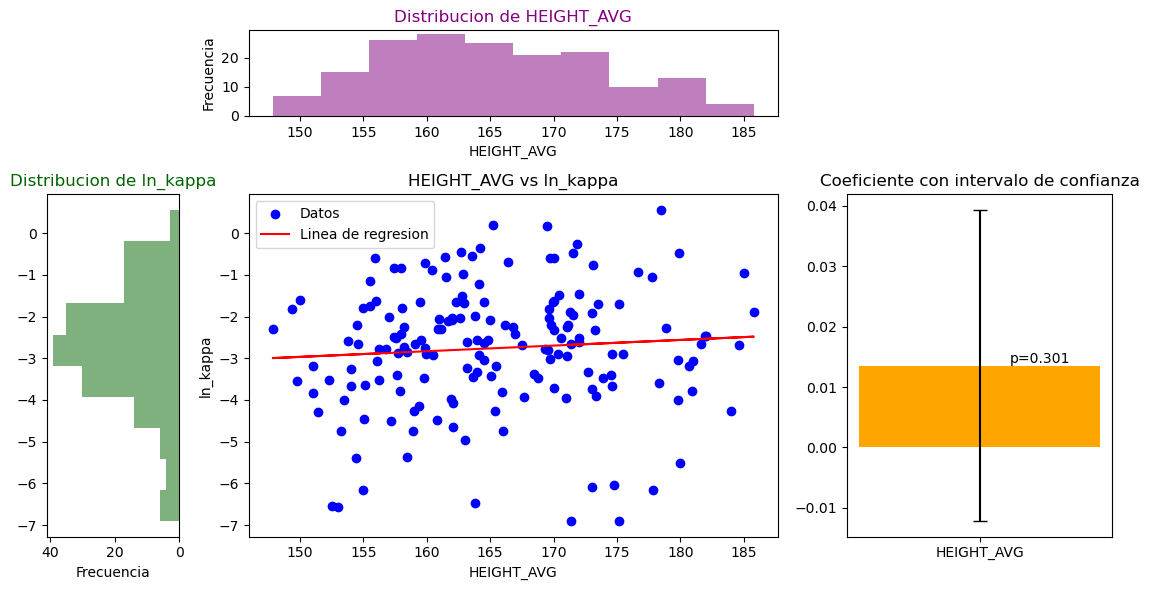

Running regression for WAIST_AVG
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.945
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0486
Time:                        18:45:33   Log-Likelihood:                -306.76
No. Observations:                 171   AIC:                             617.5
Df Residuals:                     169   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.62

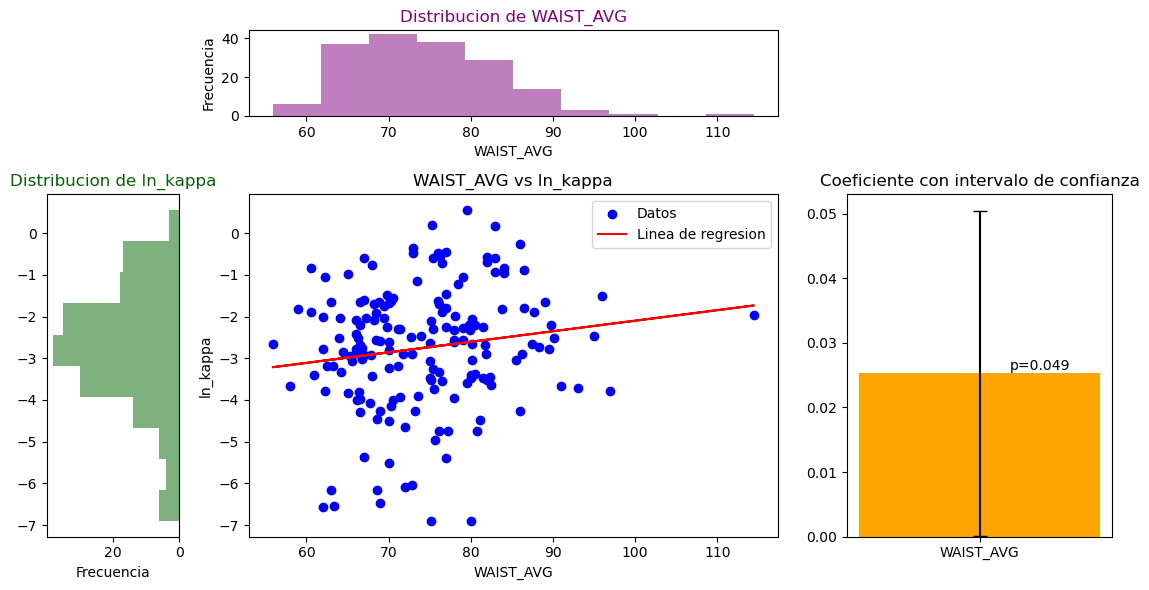

Running regression for WHrT
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.684
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.103
Time:                        18:45:33   Log-Likelihood:                -304.26
No. Observations:                 169   AIC:                             612.5
Df Residuals:                     167   BIC:                             618.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4333   

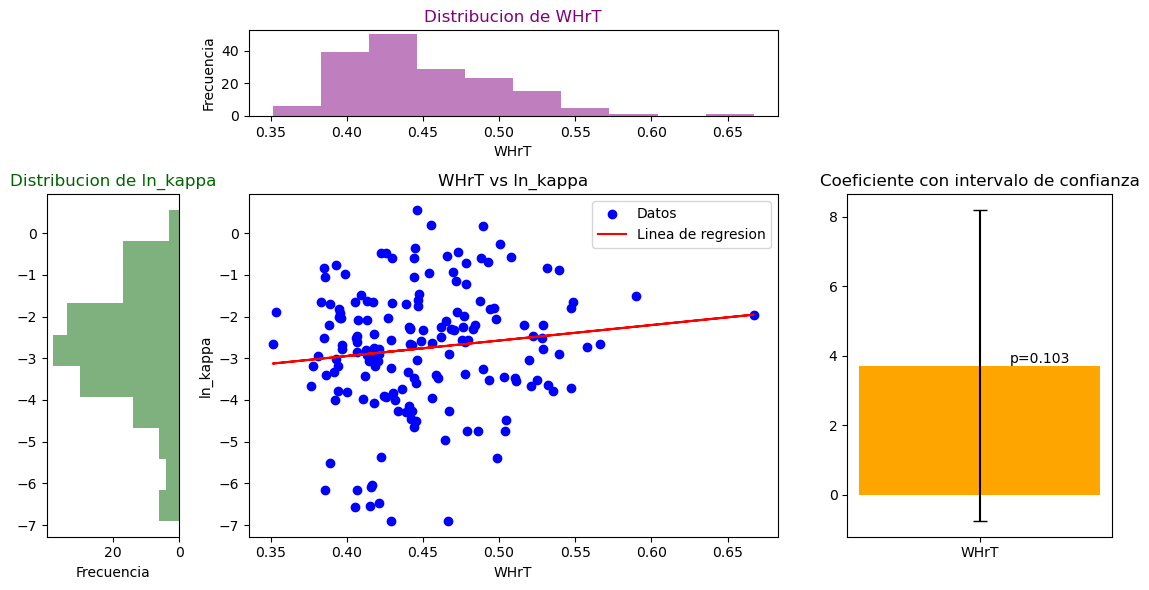

Running regression for WHrT_Risk
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5967
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.441
Time:                        18:45:34   Log-Likelihood:                -305.30
No. Observations:                 169   AIC:                             614.6
Df Residuals:                     167   BIC:                             620.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.79

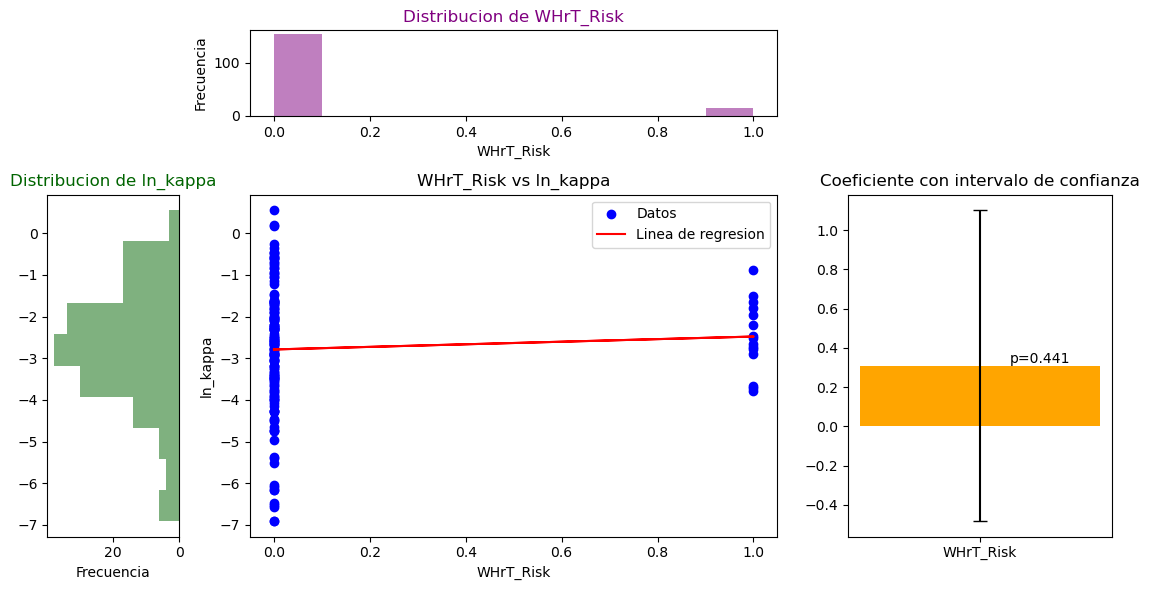

Running regression for BMI
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.145
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0434
Time:                        18:45:35   Log-Likelihood:                -298.33
No. Observations:                 166   AIC:                             600.7
Df Residuals:                     164   BIC:                             606.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3344    

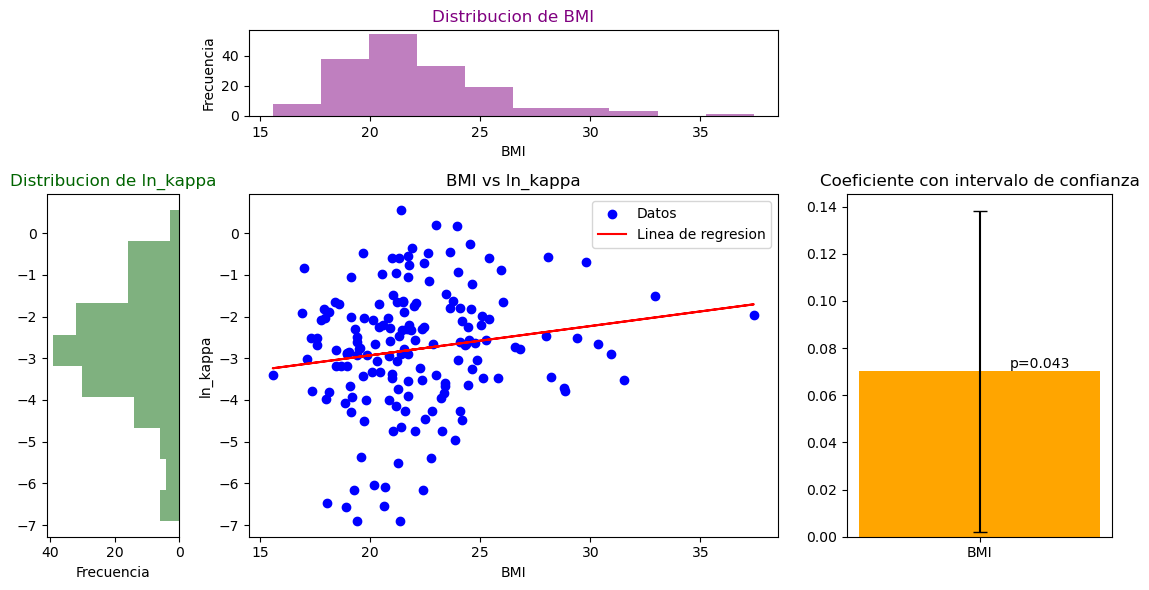

Running regression for CHVI_BMI
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.773
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.185
Time:                        18:45:35   Log-Likelihood:                -299.51
No. Observations:                 166   AIC:                             603.0
Df Residuals:                     164   BIC:                             609.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.161

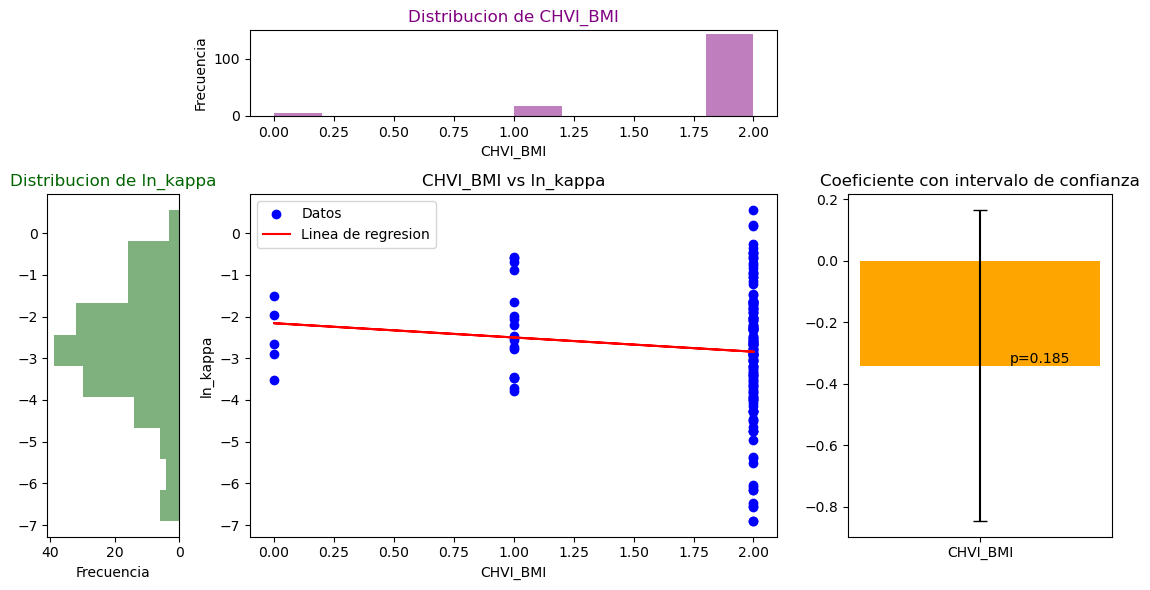

Running regression for MIN_HR
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.02601
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.872
Time:                        18:45:36   Log-Likelihood:                -304.71
No. Observations:                 169   AIC:                             613.4
Df Residuals:                     167   BIC:                             619.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6556 

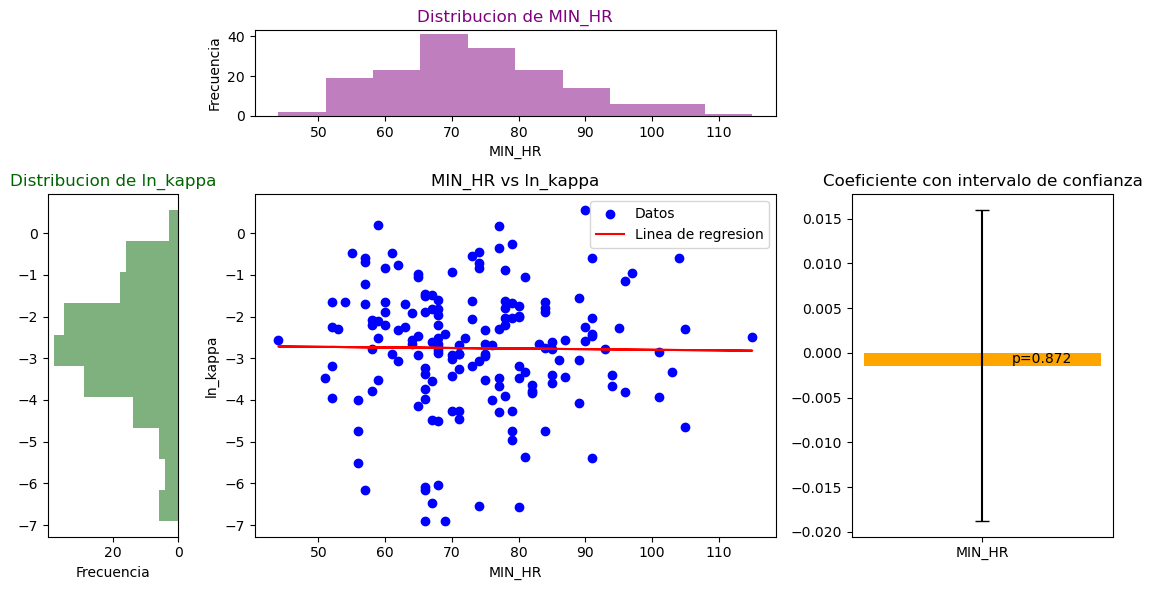

Running regression for SBP_AVG
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1061
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.745
Time:                        18:45:37   Log-Likelihood:                -311.31
No. Observations:                 173   AIC:                             626.6
Df Residuals:                     171   BIC:                             632.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0606

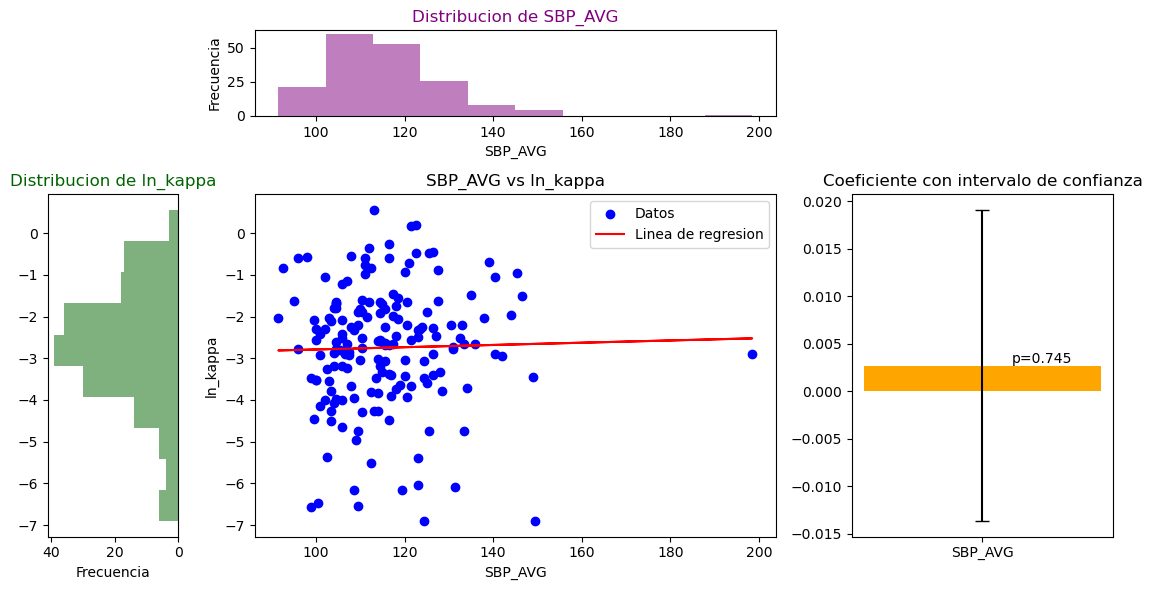

Running regression for DBP_AVG
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4274
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.514
Time:                        18:45:37   Log-Likelihood:                -311.14
No. Observations:                 173   AIC:                             626.3
Df Residuals:                     171   BIC:                             632.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2510

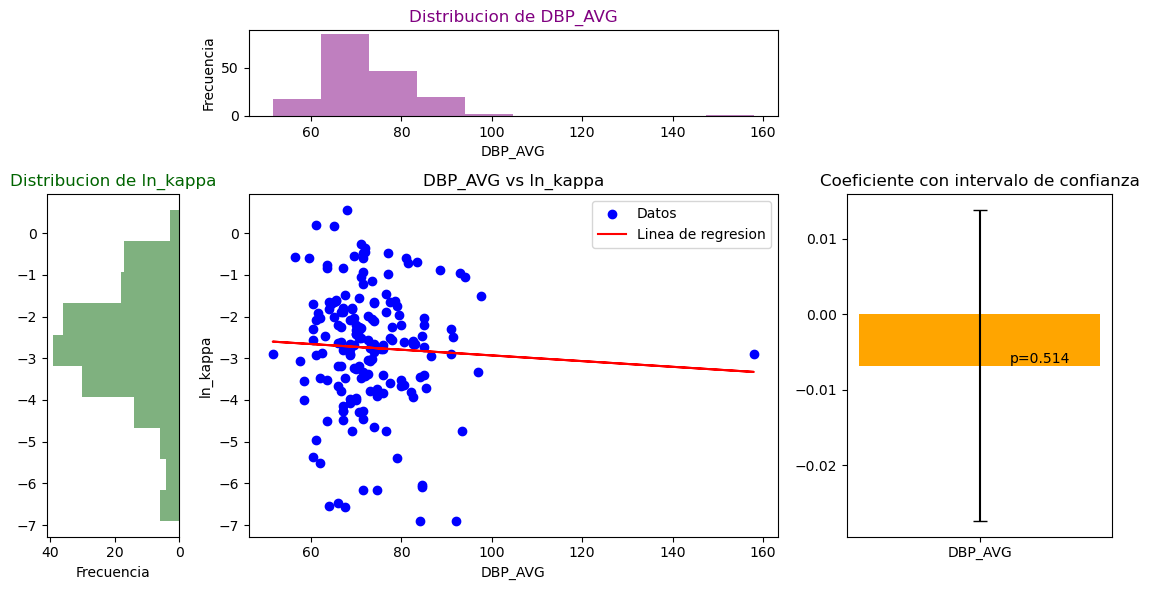

Running regression for CHVI_BP
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04291
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.836
Time:                        18:45:38   Log-Likelihood:                -311.34
No. Observations:                 173   AIC:                             626.7
Df Residuals:                     171   BIC:                             633.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6906

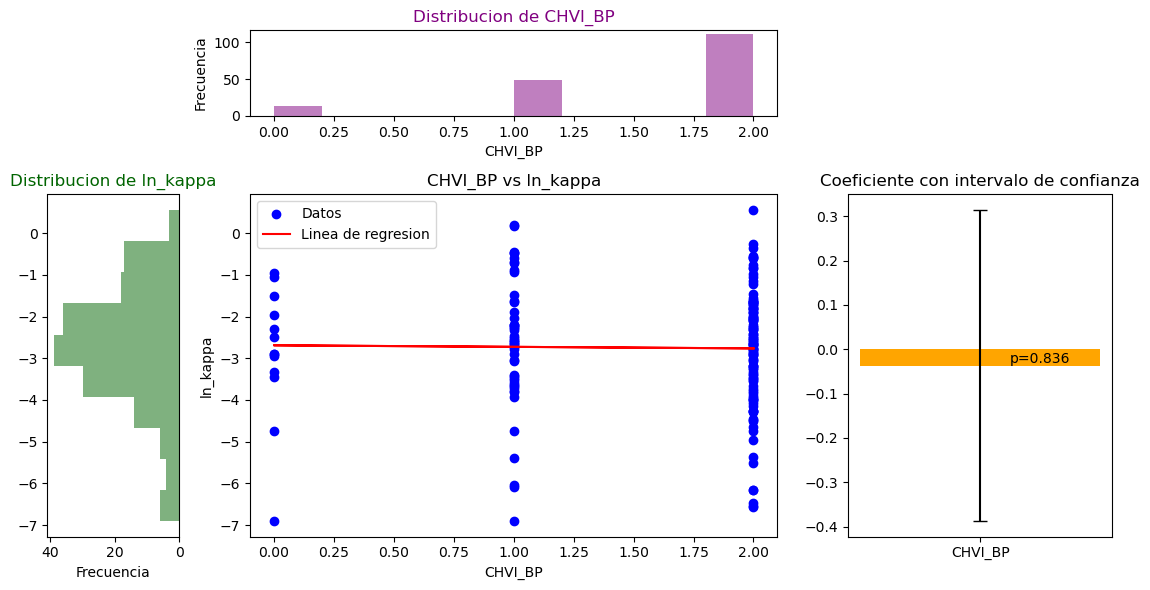

Running regression for CHOLESTEROL_MG_DL
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7369
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.392
Time:                        18:45:38   Log-Likelihood:                -301.88
No. Observations:                 167   AIC:                             607.8
Df Residuals:                     165   BIC:                             614.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

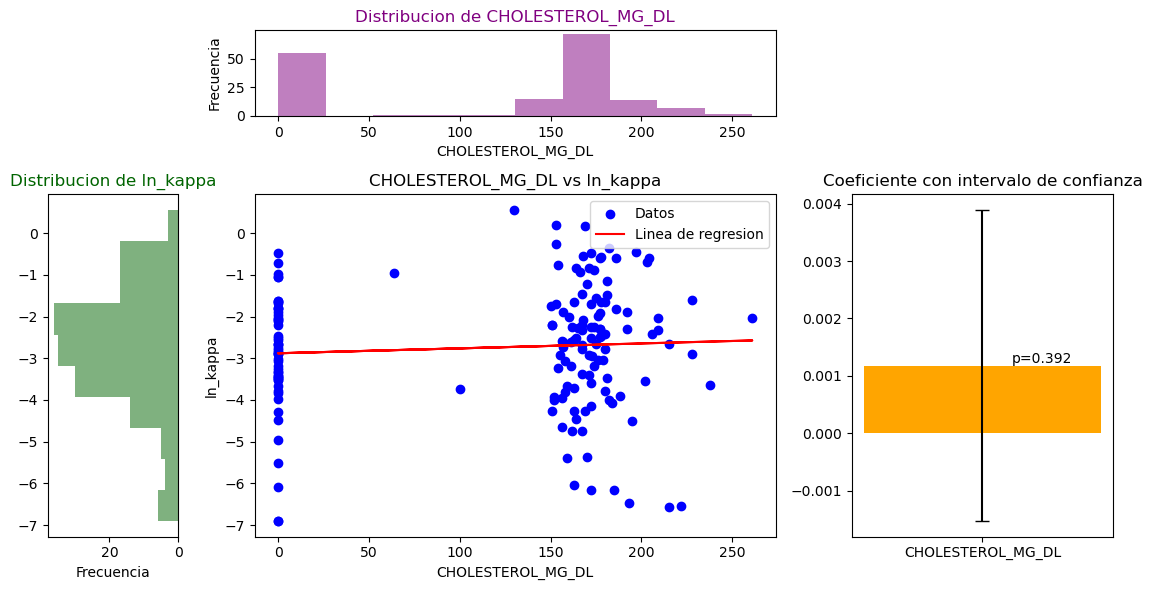

Running regression for CHVI_CHOL
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1190
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.731
Time:                        18:45:39   Log-Likelihood:                -302.19
No. Observations:                 167   AIC:                             608.4
Df Residuals:                     165   BIC:                             614.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.64

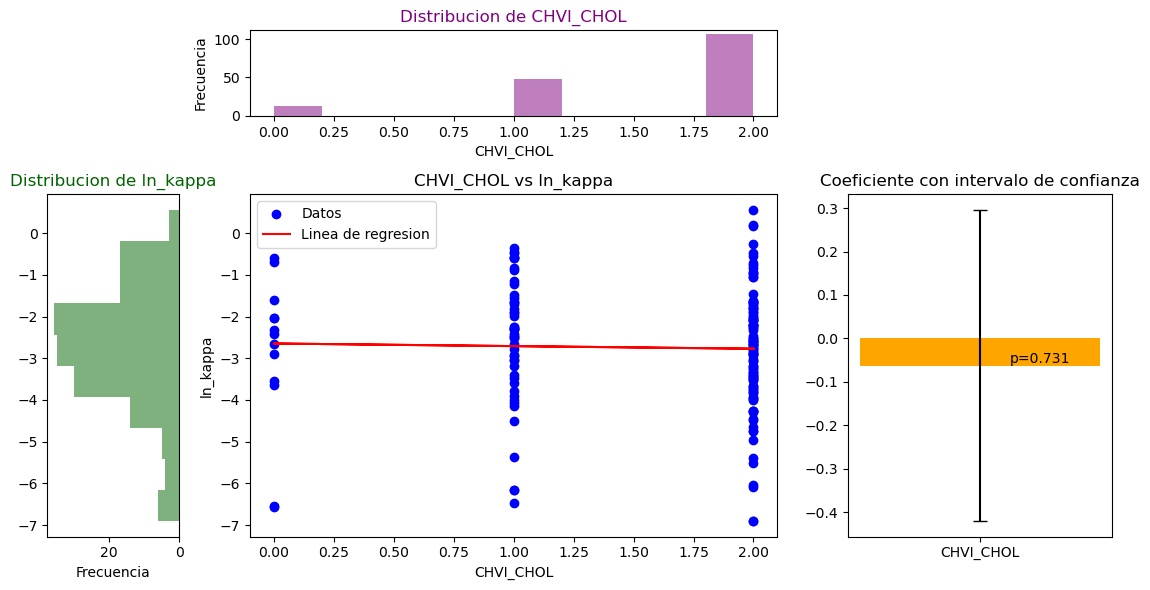

Running regression for GLUCOSE_MG_DL
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2632
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.609
Time:                        18:45:40   Log-Likelihood:                -309.00
No. Observations:                 172   AIC:                             622.0
Df Residuals:                     170   BIC:                             628.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const    

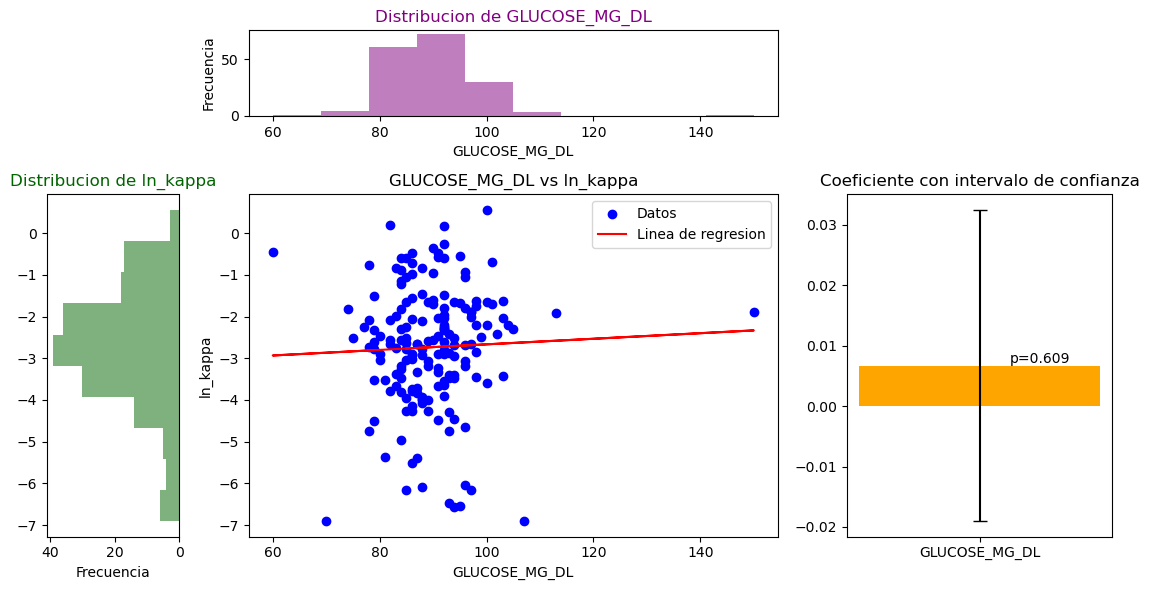

Running regression for CHVI_GLUC
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.784
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.183
Time:                        18:45:40   Log-Likelihood:                -308.24
No. Observations:                 172   AIC:                             620.5
Df Residuals:                     170   BIC:                             626.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.82

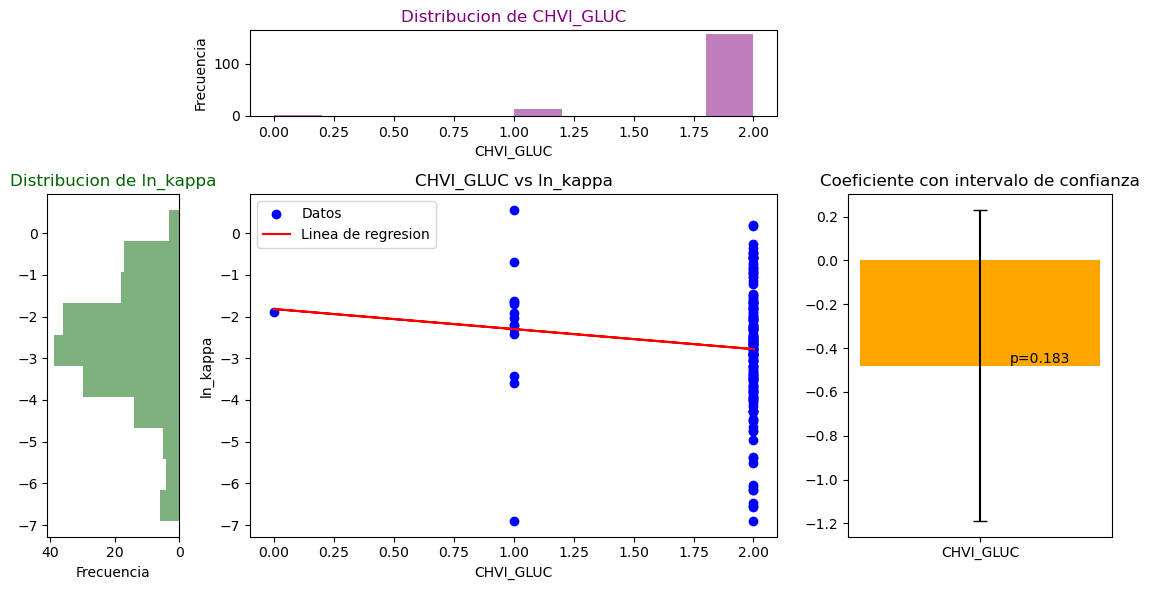

Running regression for CHVI_TOBACCO
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.889
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.171
Time:                        18:45:41   Log-Likelihood:                -285.50
No. Observations:                 157   AIC:                             575.0
Df Residuals:                     155   BIC:                             581.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

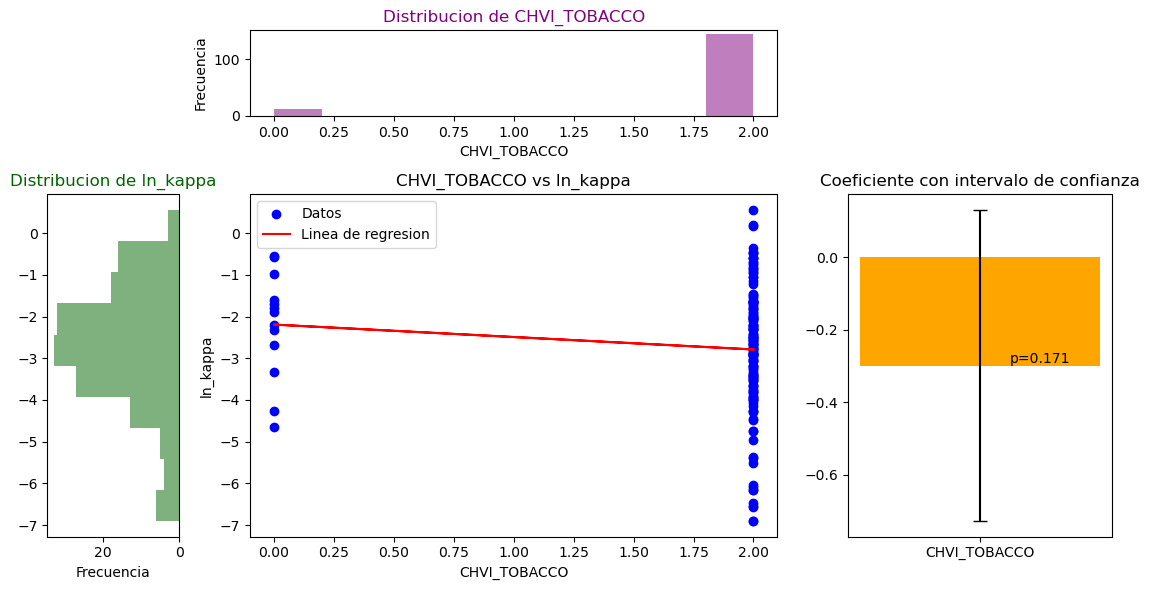

Running regression for VPA
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2396
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.625
Time:                        18:45:42   Log-Likelihood:                -271.00
No. Observations:                 151   AIC:                             546.0
Df Residuals:                     149   BIC:                             552.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7781    

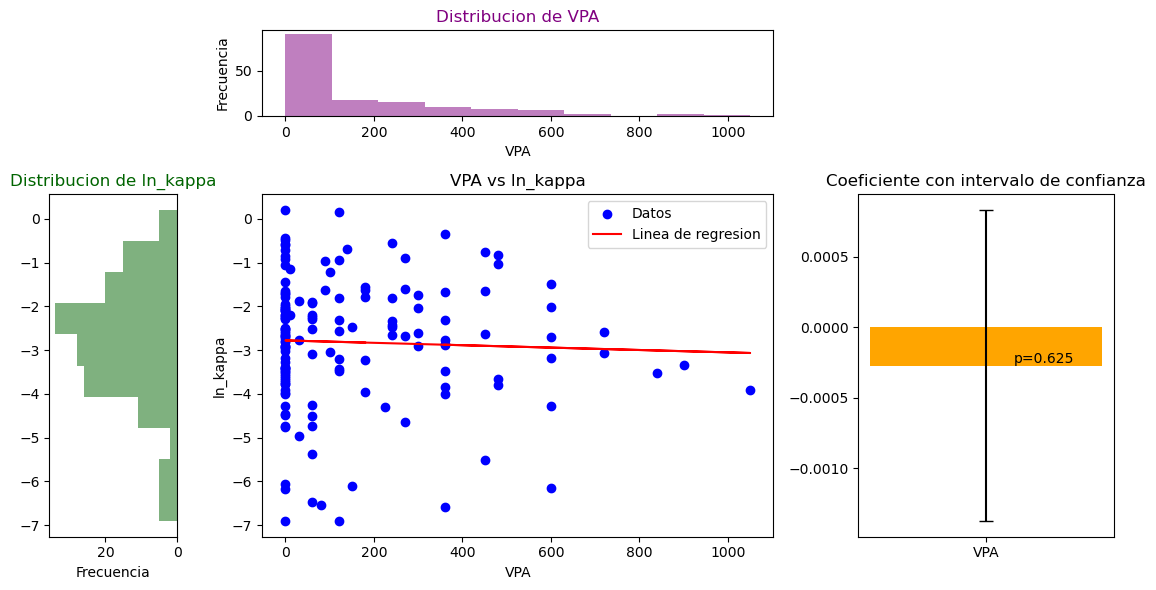

Running regression for VPA_METS
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2396
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.625
Time:                        18:45:42   Log-Likelihood:                -271.00
No. Observations:                 151   AIC:                             546.0
Df Residuals:                     149   BIC:                             552.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.778

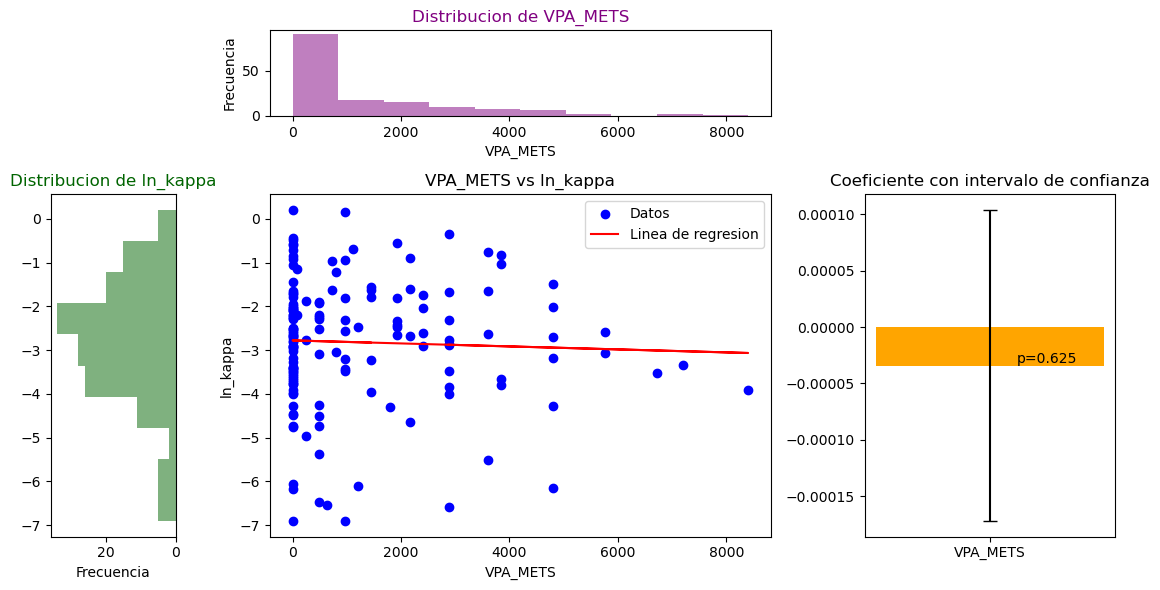

Running regression for MPA
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1862
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.667
Time:                        18:45:43   Log-Likelihood:                -300.39
No. Observations:                 169   AIC:                             604.8
Df Residuals:                     167   BIC:                             611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7374    

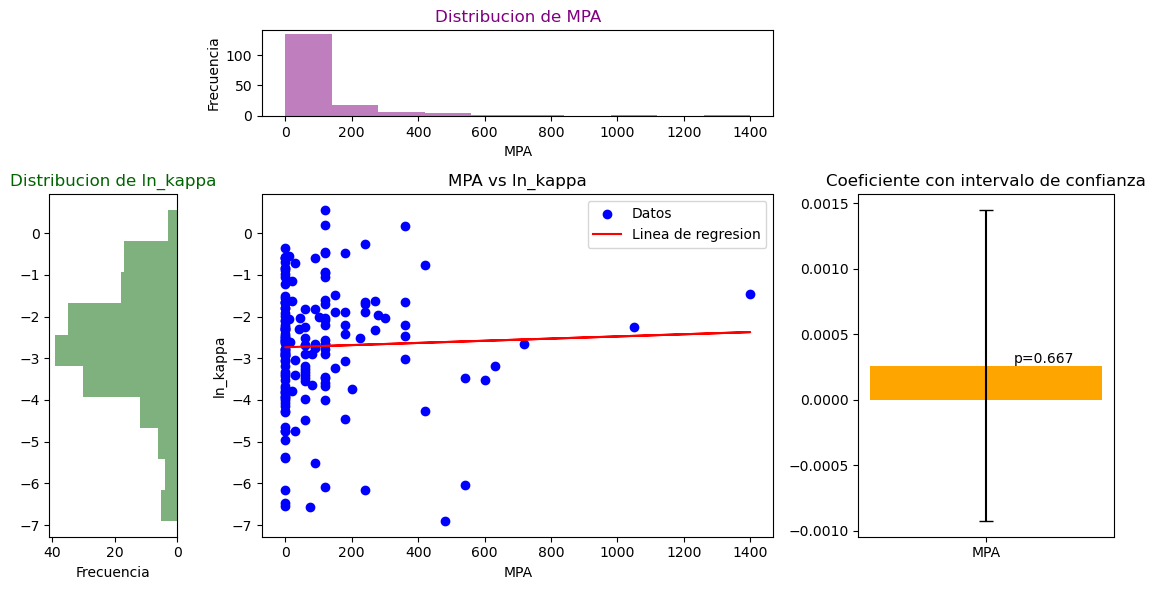

Running regression for MPA_METS
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1862
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.667
Time:                        18:45:44   Log-Likelihood:                -300.39
No. Observations:                 169   AIC:                             604.8
Df Residuals:                     167   BIC:                             611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.737

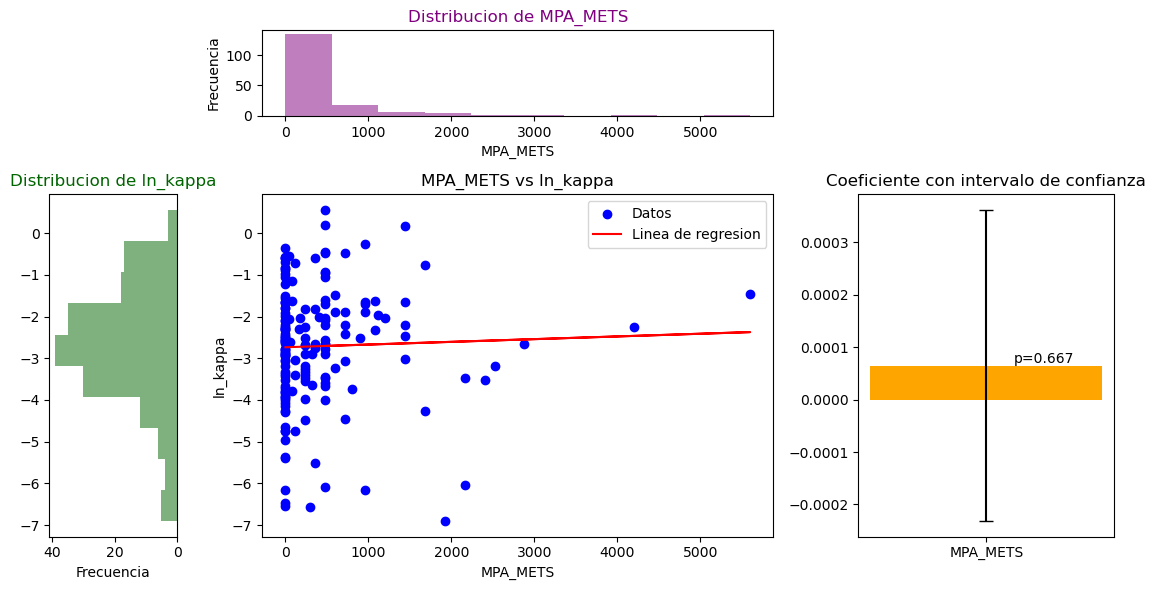

Running regression for CVHI_PA
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.04933
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.825
Time:                        18:45:44   Log-Likelihood:                -260.39
No. Observations:                 147   AIC:                             524.8
Df Residuals:                     145   BIC:                             530.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8244

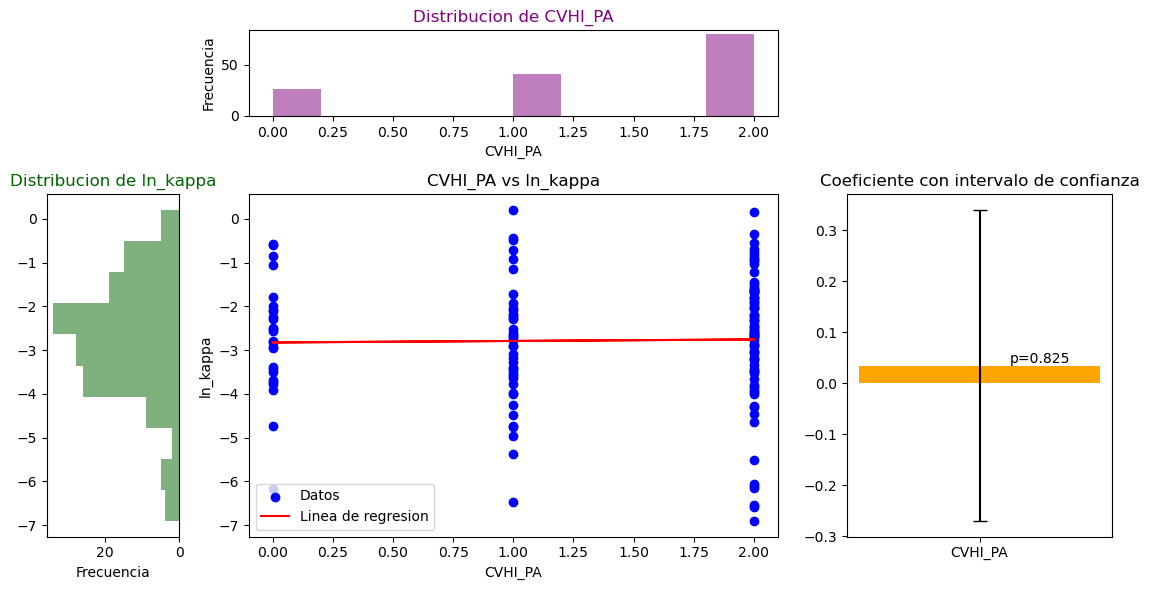

Running regression for WALKING
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9642
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.328
Time:                        18:45:45   Log-Likelihood:                -307.49
No. Observations:                 171   AIC:                             619.0
Df Residuals:                     169   BIC:                             625.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8452

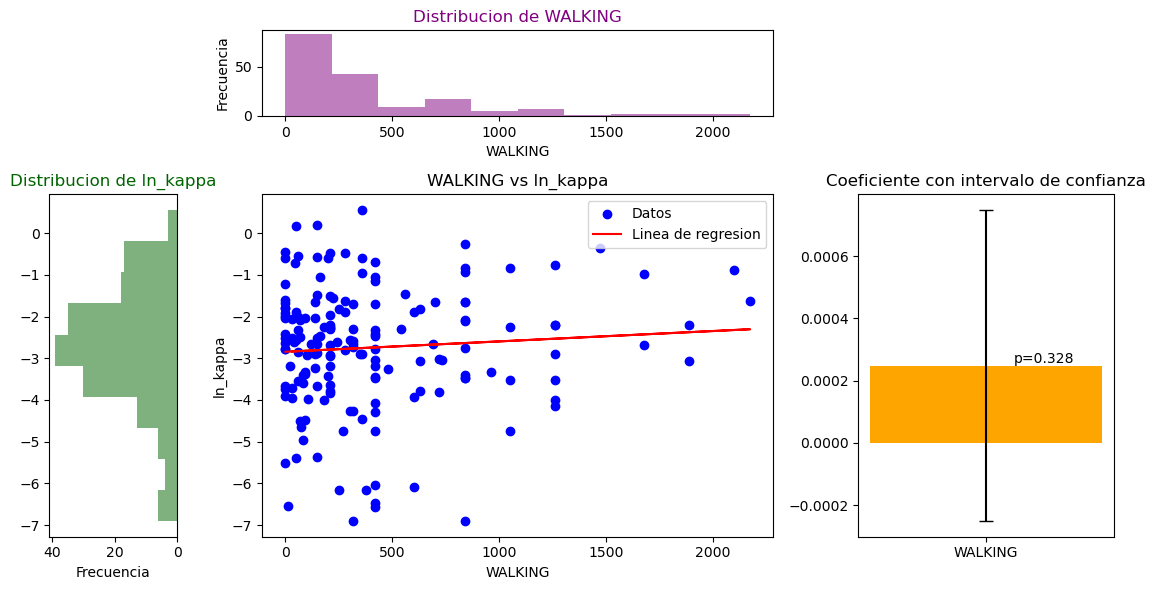

Running regression for WALKING_METS
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9642
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.328
Time:                        18:45:45   Log-Likelihood:                -307.49
No. Observations:                 171   AIC:                             619.0
Df Residuals:                     169   BIC:                             625.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

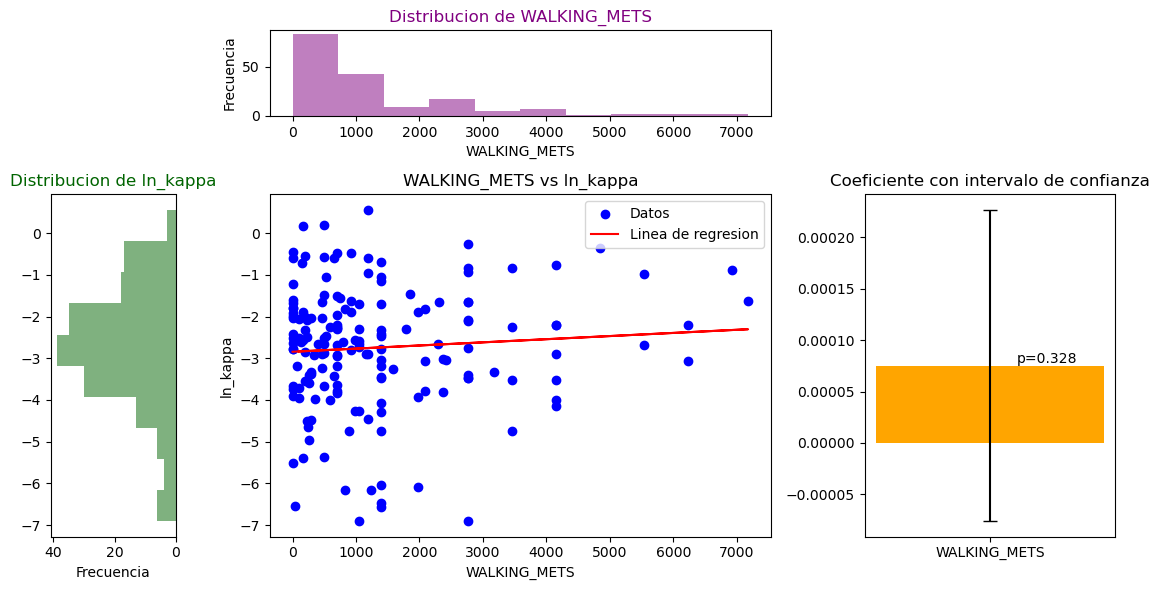

Running regression for MIN_WK_SIT
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.136
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.288
Time:                        18:45:46   Log-Likelihood:                -293.67
No. Observations:                 162   AIC:                             591.3
Df Residuals:                     160   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3

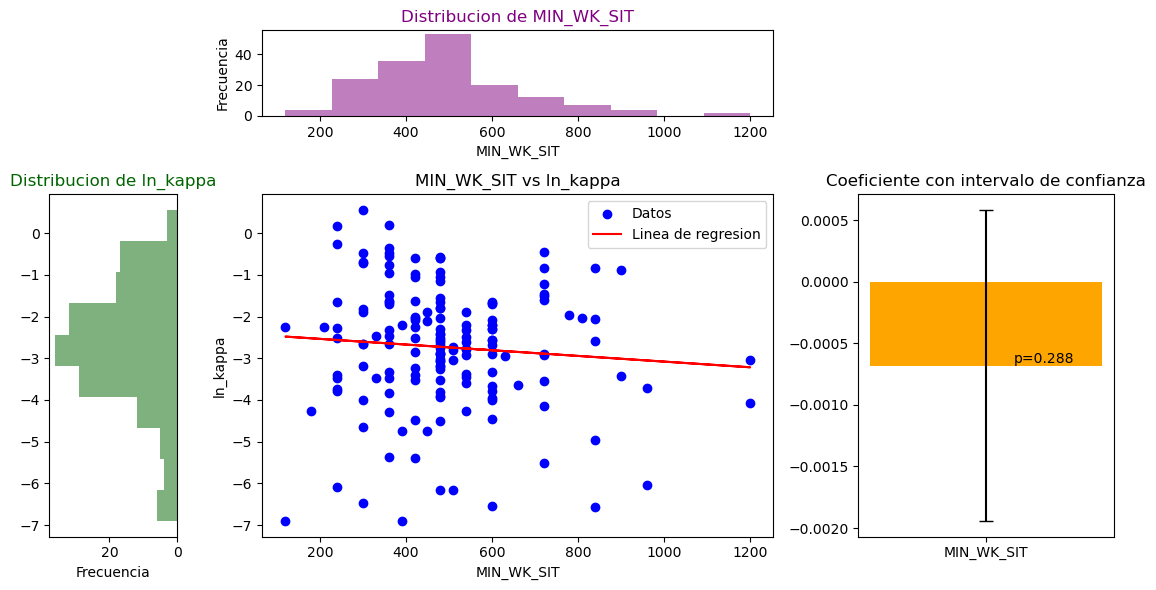

Running regression for TOTAL_METS
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.086
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.299
Time:                        18:45:47   Log-Likelihood:                -307.43
No. Observations:                 171   AIC:                             618.9
Df Residuals:                     169   BIC:                             625.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8

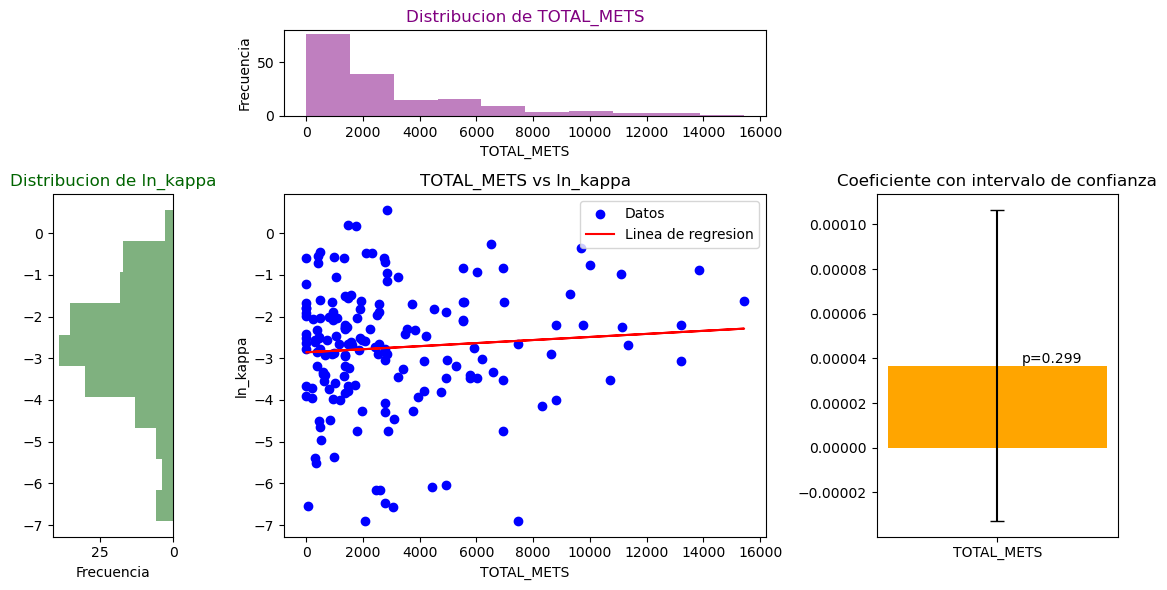

Running regression for GRAINS
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6864
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.409
Time:                        18:45:47   Log-Likelihood:                -285.58
No. Observations:                 158   AIC:                             575.2
Df Residuals:                     156   BIC:                             581.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8349 

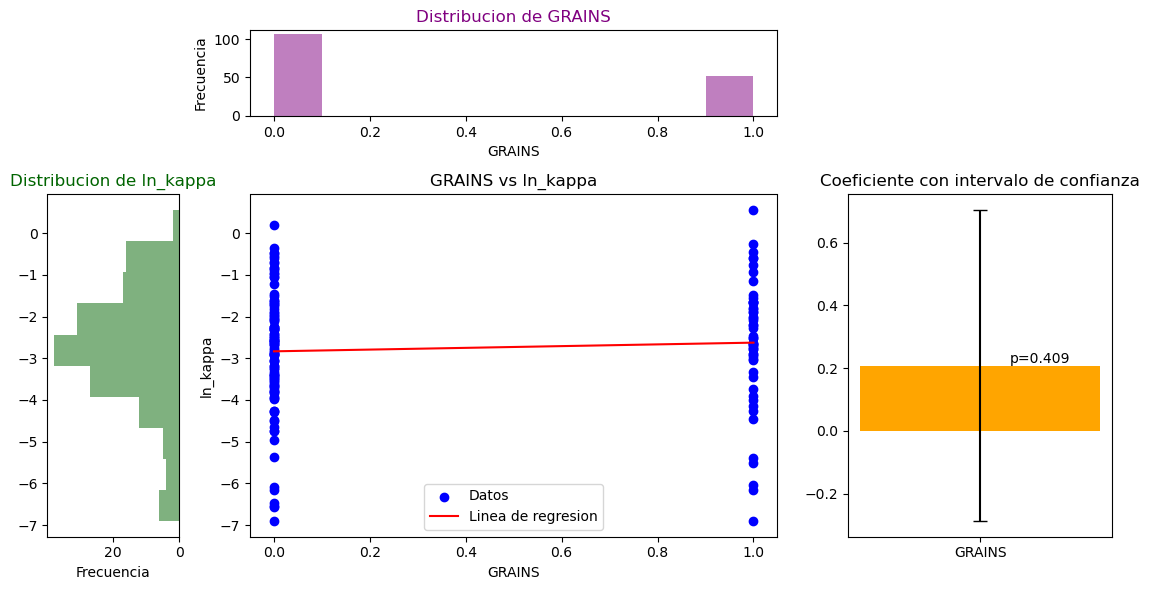

Running regression for BEVERAGE
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.033
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.311
Time:                        18:45:48   Log-Likelihood:                -285.40
No. Observations:                 158   AIC:                             574.8
Df Residuals:                     156   BIC:                             580.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.585

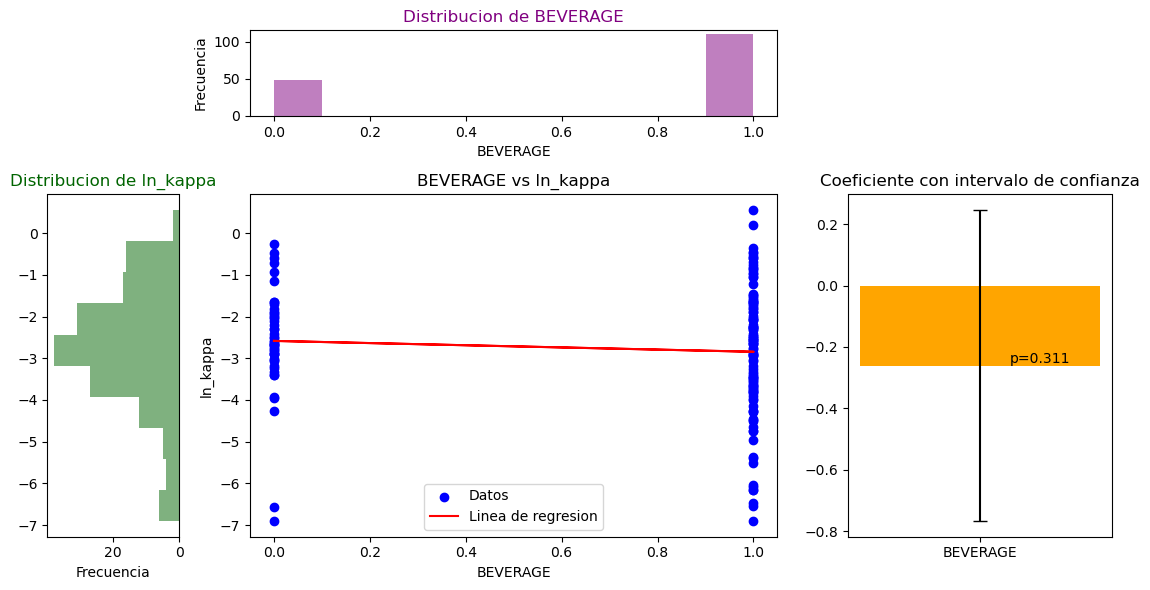

Running regression for FRUITS
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.433
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.233
Time:                        18:45:49   Log-Likelihood:                -285.20
No. Observations:                 158   AIC:                             574.4
Df Residuals:                     156   BIC:                             580.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8185 

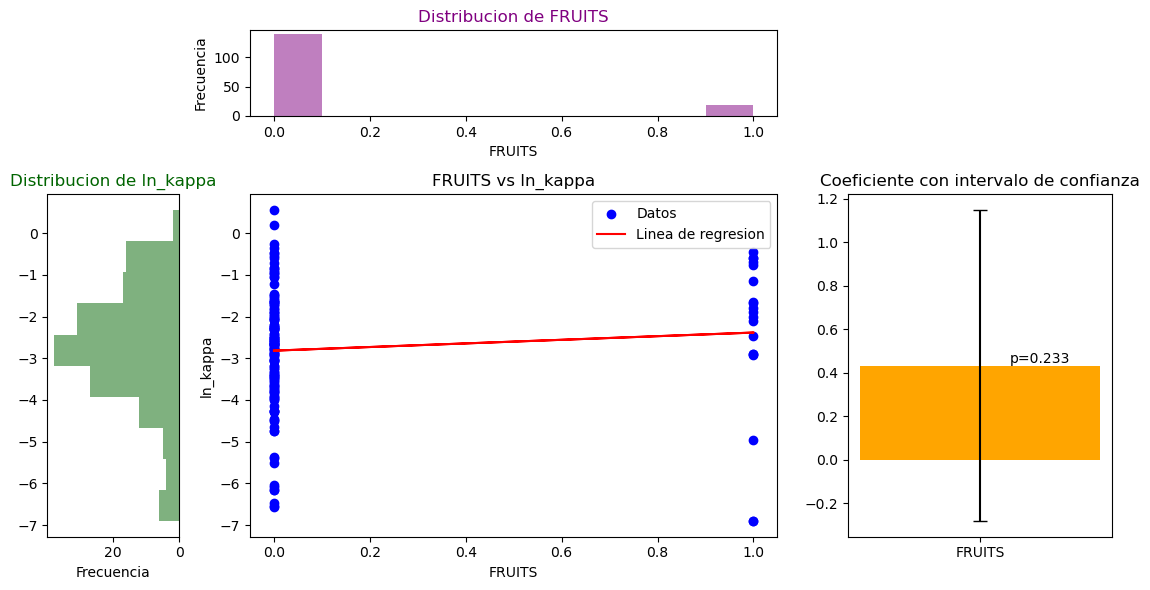

Running regression for CVHI_DIET
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2476
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.619
Time:                        18:45:49   Log-Likelihood:                -285.80
No. Observations:                 158   AIC:                             575.6
Df Residuals:                     156   BIC:                             581.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.88

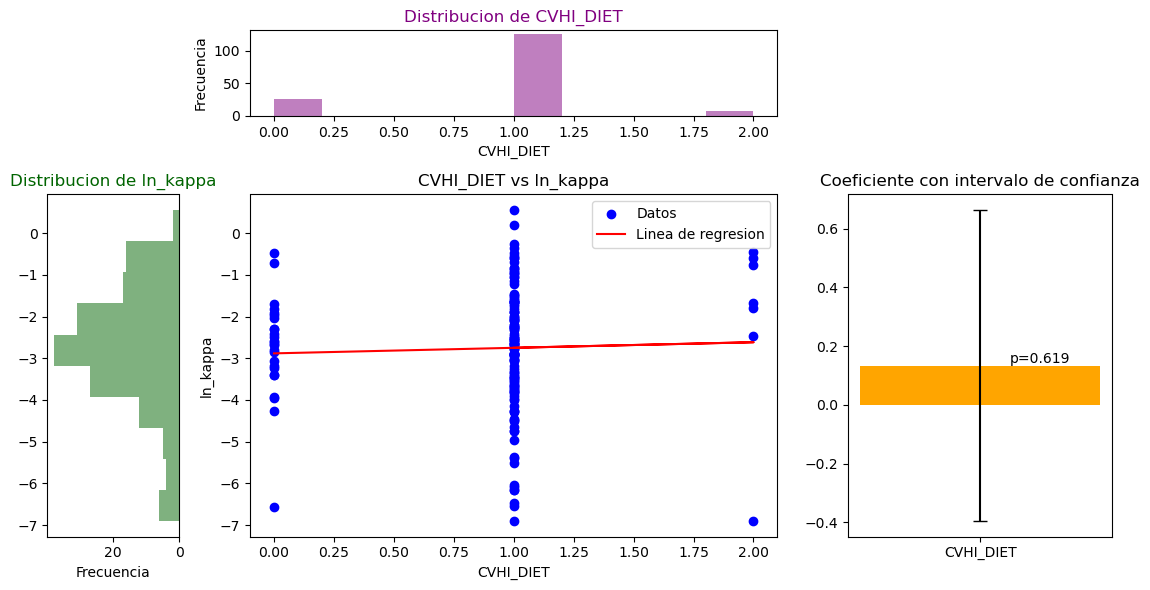

Running regression for TOTAL_CVHI
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5674
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.453
Time:                        18:45:50   Log-Likelihood:                -208.17
No. Observations:                 114   AIC:                             420.3
Df Residuals:                     112   BIC:                             425.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0

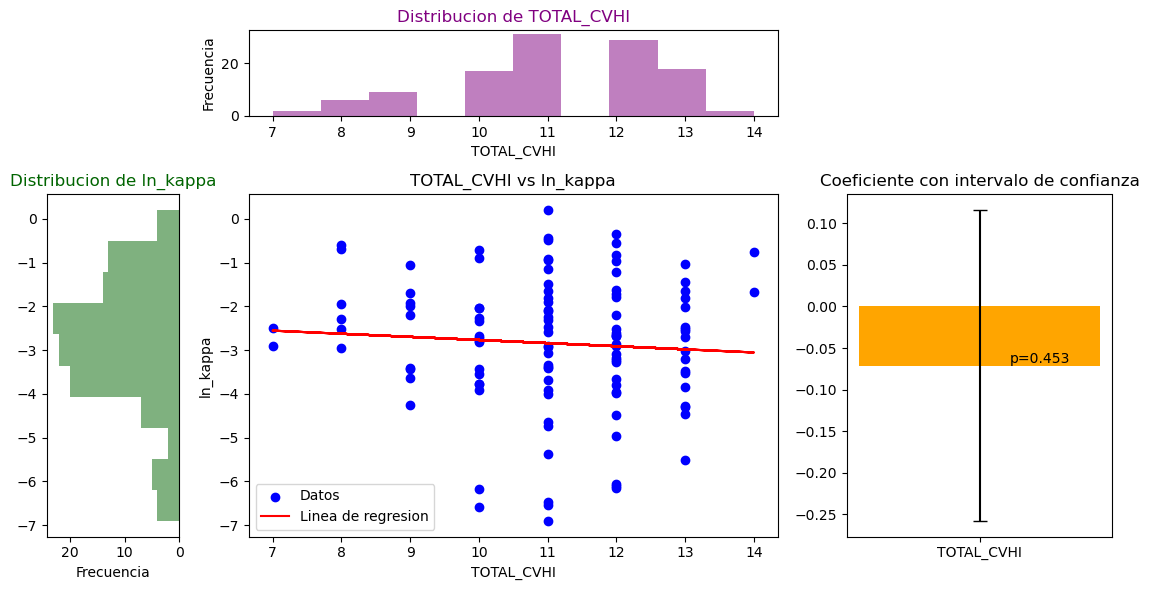

Running regression for FANTASIA_T
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5645
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.454
Time:                        18:45:51   Log-Likelihood:                -171.38
No. Observations:                  96   AIC:                             346.8
Df Residuals:                      94   BIC:                             351.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1

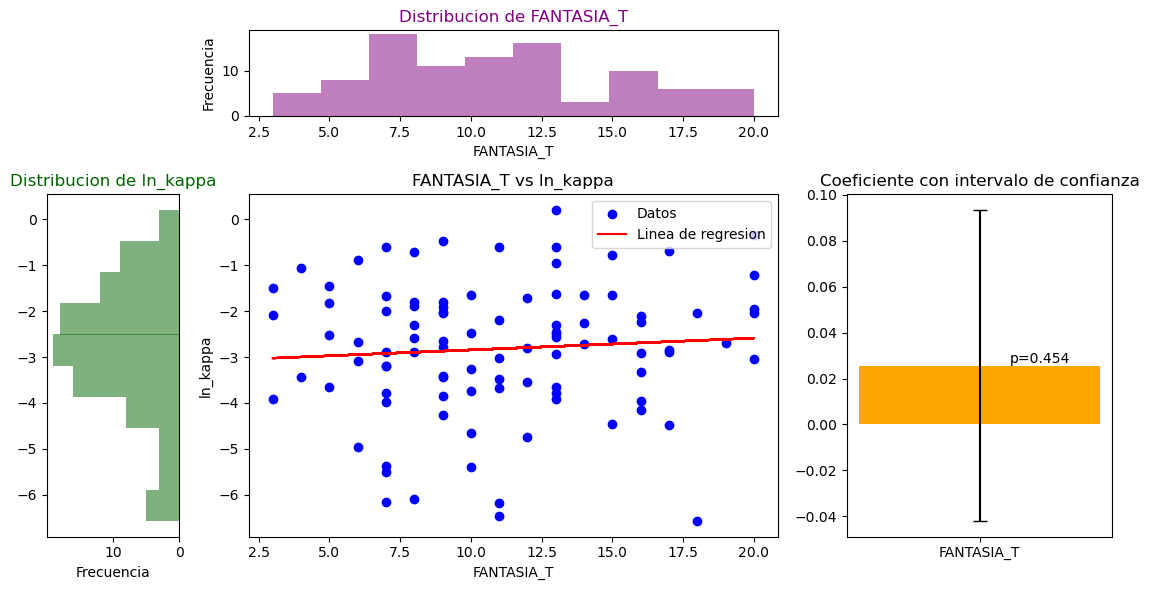

Running regression for PREO_EMPATICA
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.08996
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.765
Time:                        18:45:51   Log-Likelihood:                -171.62
No. Observations:                  96   AIC:                             347.2
Df Residuals:                      94   BIC:                             352.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const    

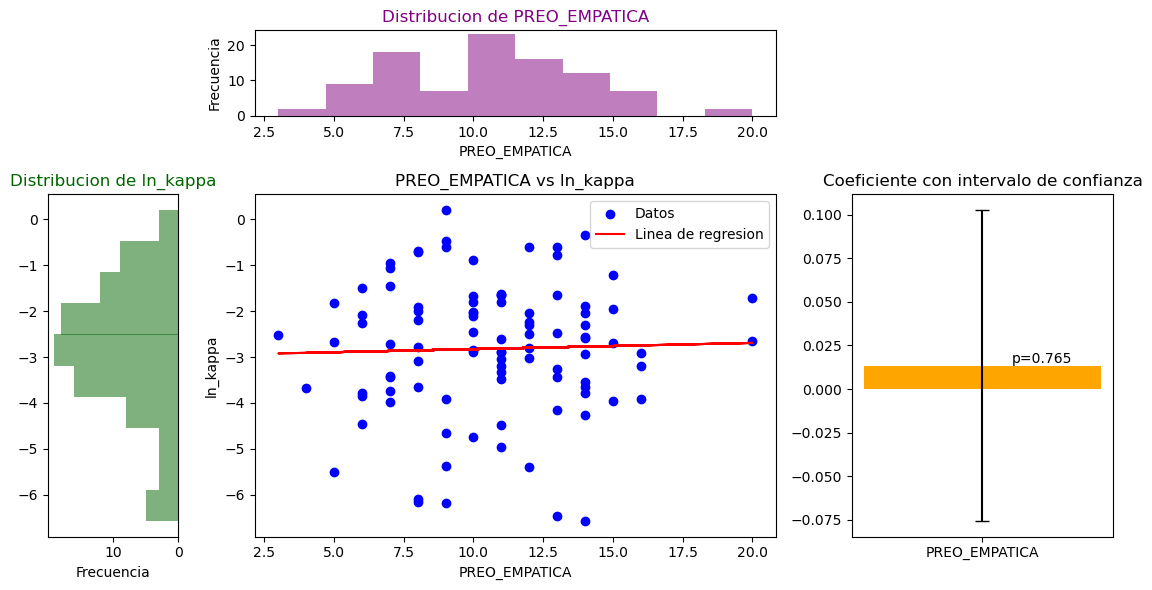

Running regression for TOMA_PERSPECTIVA
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6017
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.440
Time:                        18:45:52   Log-Likelihood:                -171.36
No. Observations:                  96   AIC:                             346.7
Df Residuals:                      94   BIC:                             351.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


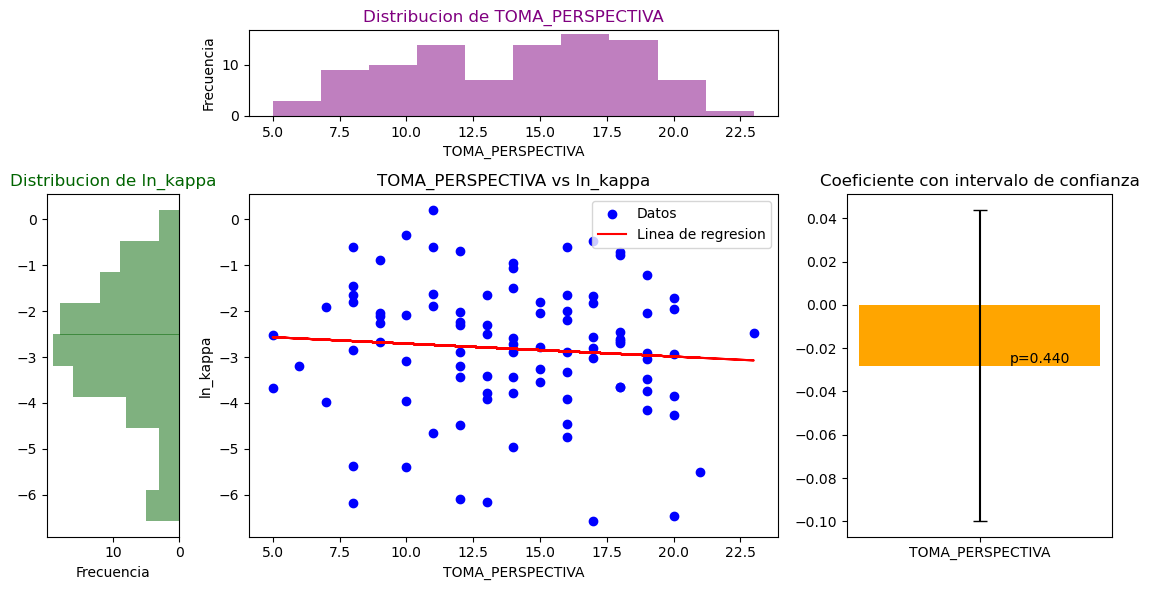

Running regression for MALESTAR_PERSONAL
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.985
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.162
Time:                        18:45:53   Log-Likelihood:                -170.66
No. Observations:                  96   AIC:                             345.3
Df Residuals:                      94   BIC:                             350.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

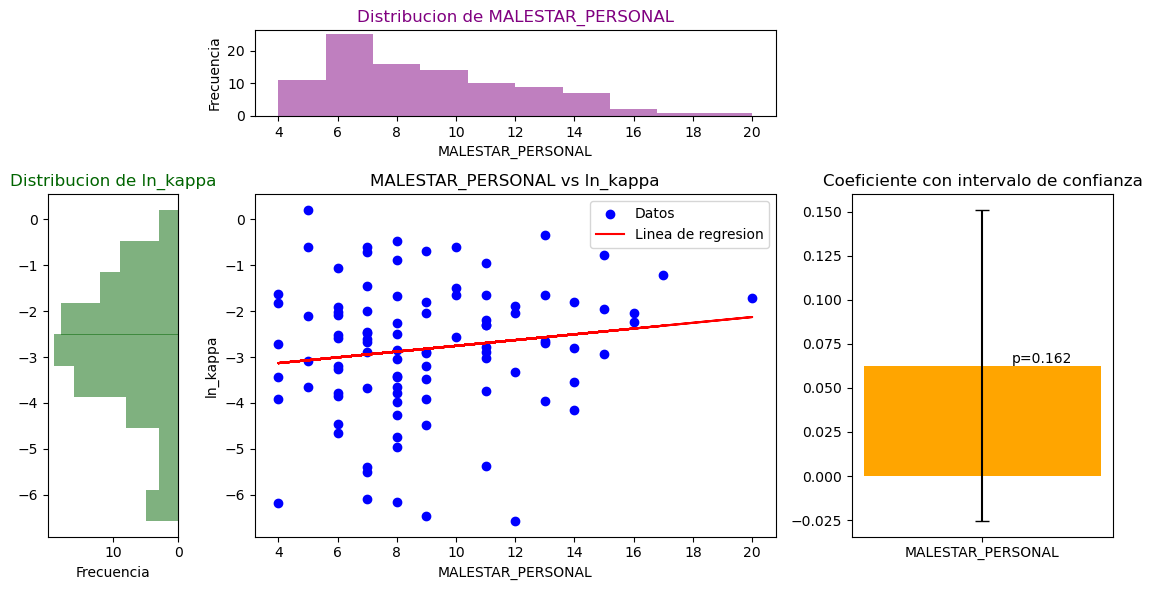

Running regression for PSS_TOTAL
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5614
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.456
Time:                        18:45:53   Log-Likelihood:                -176.24
No. Observations:                  97   AIC:                             356.5
Df Residuals:                      95   BIC:                             361.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.54

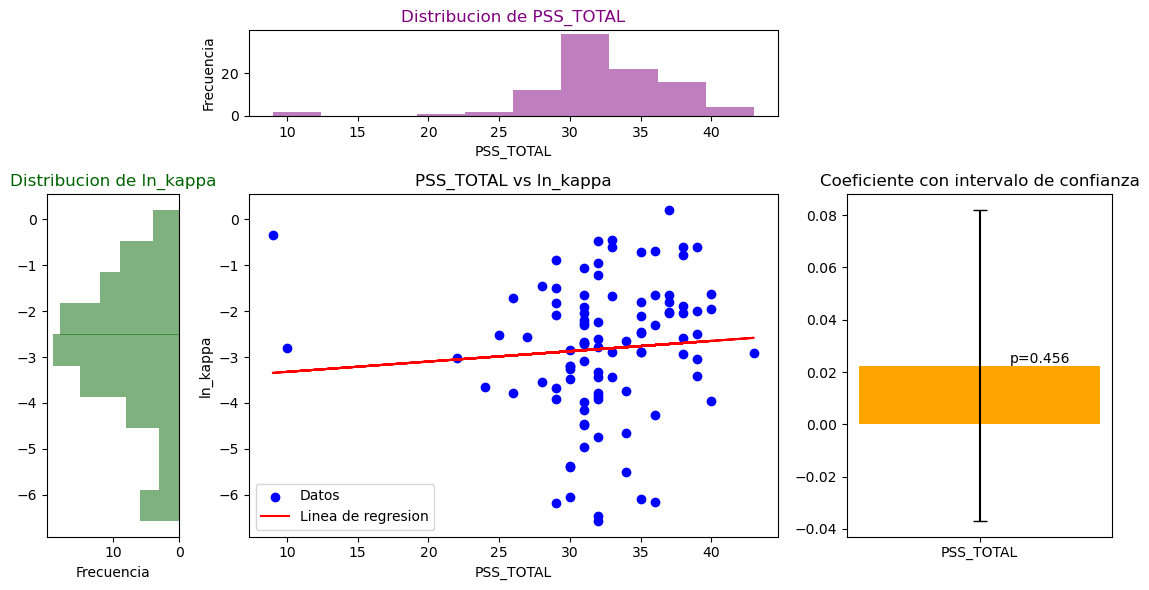

Running regression for Atencion_Emocional
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.126
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.291
Time:                        18:45:54   Log-Likelihood:                -173.04
No. Observations:                  96   AIC:                             350.1
Df Residuals:                      94   BIC:                             355.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

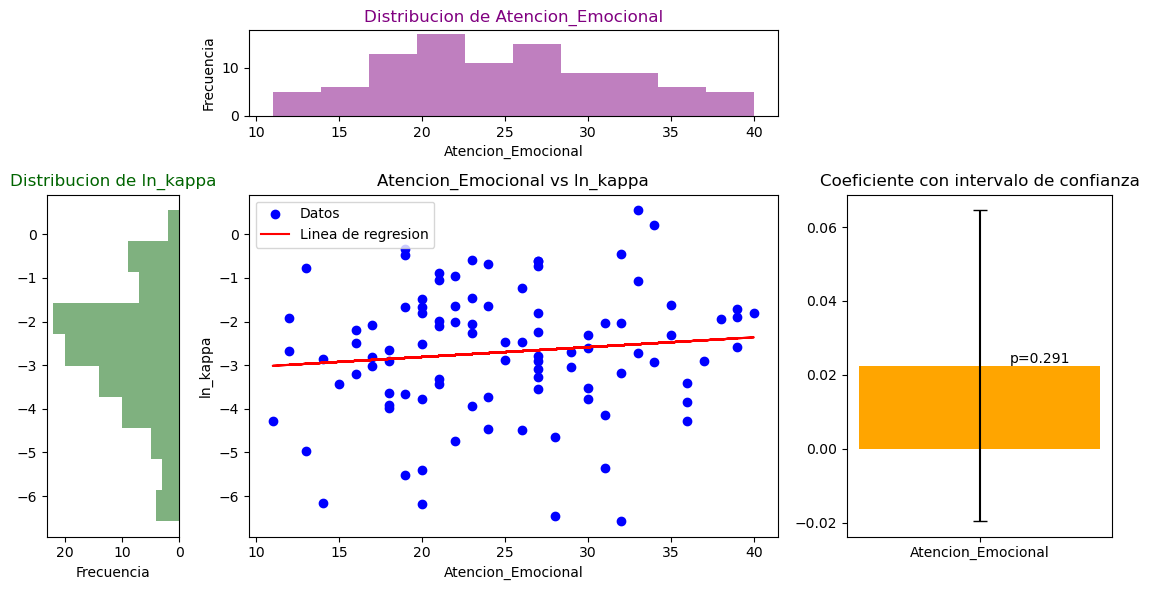

Running regression for CLARIDAD_SENTIMIENTOS
                            OLS Regression Results                            
Dep. Variable:               ln_kappa   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3244
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.570
Time:                        18:45:55   Log-Likelihood:                -173.45
No. Observations:                  96   AIC:                             350.9
Df Residuals:                      94   BIC:                             356.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

KeyboardInterrupt: 

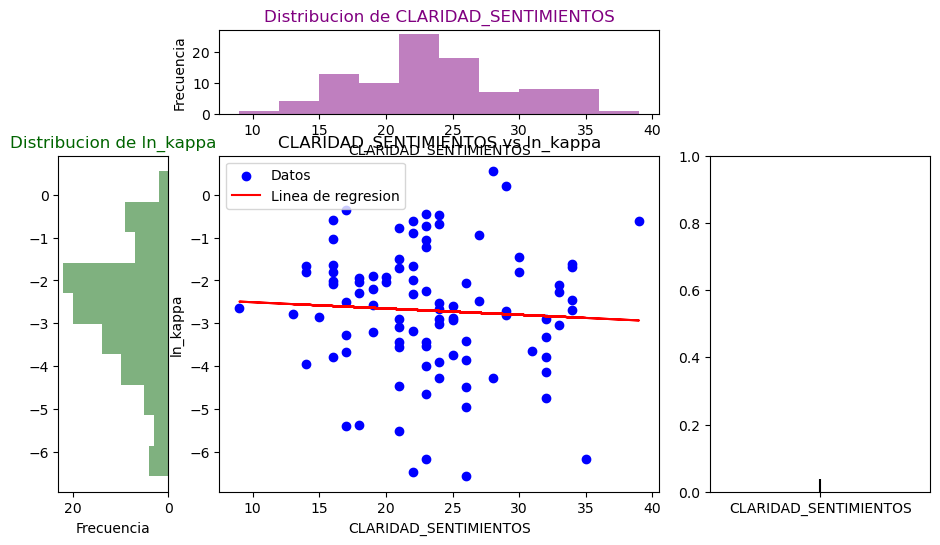

In [22]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    try:
        print(f'Running regression for {col}')
        model, df_clean, x_clean, y_clean = ols_lR(df, col)
        plot_regression_results_with_coefficients(model, df_clean, x_clean, y_clean)
    except Exception as e:
        print(f"Could not run regression for {col}: {e}")
